# BCG DATA SCIENCE AND ADVANCED ANALYTICS
## Task 2: Exploratory Data Analysis (Understanding the business through data)
### Wendy Maria D’sa

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from scipy import stats
import statsmodels.graphics.gofplots as sm
import math
from datetime import datetime
import re

# set plot style
plt.style.use('fivethirtyeight') #ggplot #fivethirtyeight #seaborn-dark

font = {'family' : 'Georgia',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

# view all columns
pd.set_option('display.max_columns', 100)

## 2. Load datafiles

In [2]:
# Load dataframe
client = 'client_data.csv'
price = 'price_data.csv'

client_df = pd.read_csv(client)
price_df = pd.read_csv(price)

In [3]:
# view data sample
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## SUB-TASK 1
## 3. Descriptive Statistics
### Volume of data

<div class="alert alert-block alert-info">
    <b>
        <li>The client dataset contains 14606 observations and 26 columns.</li>
        <li>The price dataset contains 193002 observations and 8 columns.</li>
        <li>Both client dataset and price dataset have either numerical, categorical, or datetime data types.</li>
    </b>
</div>

In [5]:
# Data volume
print(f'''
The client dataset contains {client_df.shape[0]} observations and {client_df.shape[1]} columns
The price dataset contains {price_df.shape[0]} observations and {price_df.shape[1]} columns''')


The client dataset contains 14606 observations and 26 columns
The price dataset contains 193002 observations and 8 columns


### Structure of data

In [6]:
# Data types
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
# Convert to categories
client_df[['channel_sales', 'has_gas', 'origin_up']] = client_df[['channel_sales', 'has_gas', 'origin_up']].astype('category')

In [9]:
# Convert date to datetime
client_df[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']] = client_df[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']].astype('datetime64[ns]')
price_df[['price_date']] = price_df[['price_date']].astype('datetime64[ns]')

In [10]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  category      
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [11]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


### Quality of data

<div class="alert alert-block alert-info">
    <b>
       <li>While we do not have any missing values in the numerical data types, we do have missing values in the 'channel_sales' and 'origin_up' columns.</li>
       <li>About 25% of data is missing from 'channel_sales'.</li>
       <li>Less than 0.5% of data is missing from 'origin_up'.</li><br>
       CLIENT DATA:
       <li>The bar chart for zero values proportion shows that there are some consumption variables and forecasted consumption and price variables with zero values. Since consumption or price or forecasted values most probably will never be 0, we can safely say that the real values are actually missing from the dataset.</li>
       <li>Furthermore, since a large proportion of the variables have 0 values, it would become much more difficult to pinpoint or research price sensitivity since a lot of churned companies could have 0 values.
       <li> We will need to either drop these observations or will need to update these observations with either the median or mean.</li>
       <li>'Gas consumption of the past 12 months' can have zero values since not all companies also suscribe to gas. 'Forecasted value of current discount' can also have zero values since there may be no current discount on prices.</li><br>
       PRICE DATA:
       <li>The price variables have many 0 values. We will need to either drop these observations or will need to update these observations with either the median or mean.</li>
    </b>
</div>

In [12]:
# Check null/missing values
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [13]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [14]:
# Create only numerical dataframe of client data
num_df_client = client_df.select_dtypes(include='number')
num_df_client.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,2,678.99,3,43.648,1
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,13.800,0
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,13.856,0
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,13.200,0
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,52.32,44.91,44.91,1,47.98,6,19.800,0


In [15]:
# Create dataframe to check 0 values
zero_client = pd.DataFrame((num_df_client[num_df_client == 0.0].count(axis=0)/len(num_df_client.index)))
zero_client

,0
cons_12m,0.008010
cons_gas_12m,0.821169
cons_last_month,0.341161
forecast_cons_12m,0.020950
forecast_cons_year,0.420923
forecast_discount_energy,0.964946
forecast_meter_rent_12m,0.049637
forecast_price_energy_off_peak,0.001506
forecast_price_energy_peak,0.480693
forecast_price_pow_off_peak,0.006436


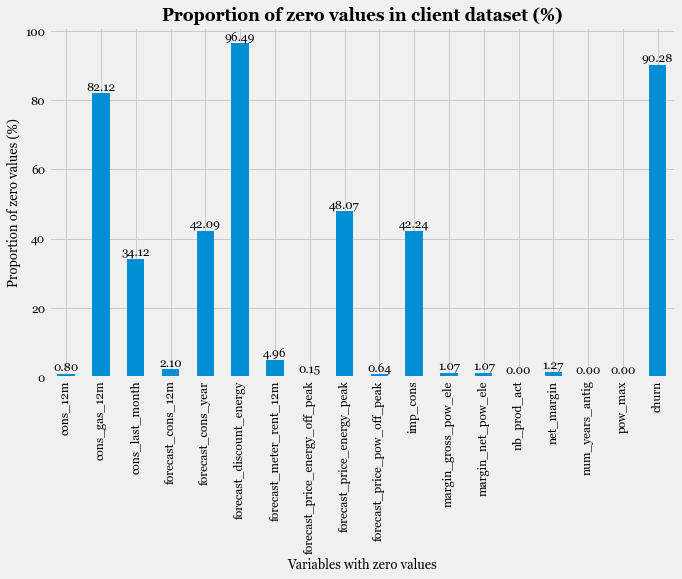

In [16]:
# Plot zero values variables
ax = (zero_client * 100).plot(kind='bar', figsize=(10,6), legend=False)

#Annotate bars
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fmt='%.2f')
        
plt.xlabel('Variables with zero values', fontsize=13)
plt.ylabel('Proportion of zero values (%)', fontsize=13)
plt.title('Proportion of zero values in client dataset (%)', fontsize=17, fontweight='bold')
plt.show()

In [17]:
# Create only numerical dataframe of price data
num_df_price = price_df.select_dtypes(include='number')
num_df_price.head()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0.151367,0.0,0.0,44.266931,0.0,0.0
1,0.151367,0.0,0.0,44.266931,0.0,0.0
2,0.151367,0.0,0.0,44.266931,0.0,0.0
3,0.149626,0.0,0.0,44.266931,0.0,0.0
4,0.149626,0.0,0.0,44.266931,0.0,0.0


In [18]:
# Create dataframe to check 0 values
zero_price = pd.DataFrame((num_df_price[num_df_price == 0.0].count(axis=0)/len(num_df_price.index)))
zero_price

,0
price_off_peak_var,0.001793
price_peak_var,0.449747
price_mid_peak_var,0.584626
price_off_peak_fix,0.007720
price_peak_fix,0.585476
price_mid_peak_fix,0.585465


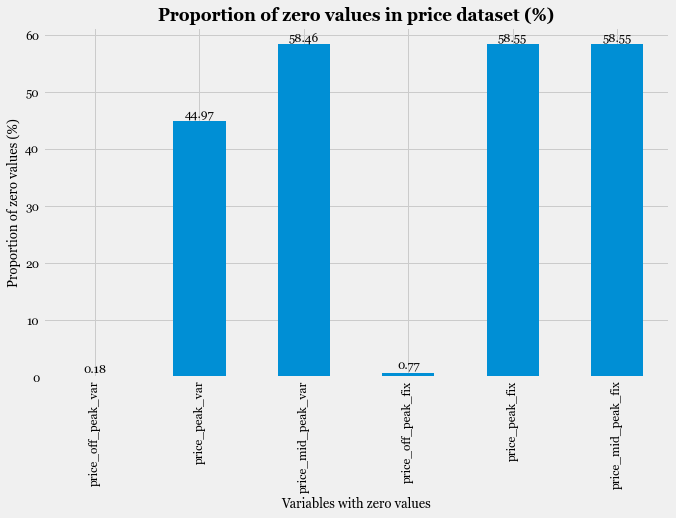

In [19]:
# Plot zero values variables
ax = (zero_price * 100).plot(kind='bar', figsize=(10,6), legend=False)

#Annotate bars
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fmt='%.2f')
        
plt.xlabel('Variables with zero values', fontsize=13)
plt.ylabel('Proportion of zero values (%)', fontsize=13)
plt.title('Proportion of zero values in price dataset (%)', fontsize=17, fontweight='bold')
plt.show()

In [20]:
# Unique values of categorical data
client_df[['channel_sales', 'has_gas', 'origin_up']].nunique()

channel_sales    8
has_gas          2
origin_up        6
dtype: int64

In [21]:
# Values of categorical data
client_df.channel_sales.value_counts(normalize=True)

foosdfpfkusacimwkcsosbicdxkicaua    0.462413
MISSING                             0.255032
lmkebamcaaclubfxadlmueccxoimlema    0.126181
usilxuppasemubllopkaafesmlibmsdf    0.094139
ewpakwlliwisiwduibdlfmalxowmwpci    0.061139
sddiedcslfslkckwlfkdpoeeailfpeds    0.000753
epumfxlbckeskwekxbiuasklxalciiuu    0.000205
fixdbufsefwooaasfcxdxadsiekoceaa    0.000137
Name: channel_sales, dtype: float64

In [22]:
client_df.has_gas.value_counts(normalize=True)

f    0.818499
t    0.181501
Name: has_gas, dtype: float64

In [23]:
client_df.origin_up.value_counts(normalize=True)

lxidpiddsbxsbosboudacockeimpuepw    0.485896
kamkkxfxxuwbdslkwifmmcsiusiuosws    0.293989
ldkssxwpmemidmecebumciepifcamkci    0.215528
MISSING                             0.004382
usapbepcfoloekilkwsdiboslwaxobdp    0.000137
ewxeelcelemmiwuafmddpobolfuxioce    0.000068
Name: origin_up, dtype: float64

### Statistics

<div class="alert alert-block alert-info">
    <b>
        <li>Client dataset has some extreme outliers in the numerical data types especially towards the higher values.</li>
        <li>There are a lot of variables with 0 minimum values. Since, price and consumption cannot be 0, we must treat these as missing values.</li>
        <li>Price dataset seems to be more normally distributed.</li>
    </b>
</div>

In [24]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [25]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## 4. Data Cleaning

<div class="alert alert-block alert-info">
    <b>
        <li>We will treat zero values as missing values. Replace zero as null for ease of cleaning.</li><br>
        LOGIC FOR DROPPING ZERO VALUES IN CLIENT DATA:
        <li>We dropped 13 observations where most of the required non-zero variables had 0 values.</li><br>
        LOGIC FOR REPLACING ZERO VALUES IN CLIENT DATA:
        <li>For categorical data we will replace zero values by mode.</li>
        <li>For numerical data we will replace zero values with median.</li><br>
        LOGIC FOR REPLACING ZERO VALUES IN PRICE DATA:
        <li>Since a majority of the price variables have ~45% - 60% zero value observations, it would be not be a good idea to replace with mean or median as the results could be very skewed and could lead to incorrect interpretations.</li>
        <li>In this case we will trim/remove the bottom 5% - 10% observations. This outlier removal method will reduce the amount of zero values or any negative prices.</li>
    </b>
</div>

In [26]:
# Select observations with all zero values in selected variables
zero_data = client_df[(client_df.cons_12m == 0) &
        (client_df.cons_last_month == 0) &
          (client_df.forecast_cons_12m == 0) &
          (client_df.forecast_cons_year == 0) &
          (client_df.imp_cons == 0) & 
          (client_df.margin_gross_pow_ele == 0) & 
          (client_df.margin_net_pow_ele == 0)  & 
          (client_df.net_margin == 0)]

In [27]:
zero_data.shape

(13, 26)

In [28]:
# Drop observations
new_client_df = client_df.drop(zero_data.index).reset_index(drop=True)
new_client_df.shape

(14593, 26)

In [29]:
# Replace MISSING with Null in categorical missing data.
new_client_df.channel_sales.replace('MISSING', np.nan, inplace=True)
new_client_df.origin_up.replace('MISSING', np.nan, inplace=True)
new_client_df.isnull().sum()

id                                   0
channel_sales                     3712
cons_12m                             0
cons_gas_12m                         0
cons_last_month                      0
date_activ                           0
date_end                             0
date_modif_prod                      0
date_renewal                         0
forecast_cons_12m                    0
forecast_cons_year                   0
forecast_discount_energy             0
forecast_meter_rent_12m              0
forecast_price_energy_off_peak       0
forecast_price_energy_peak           0
forecast_price_pow_off_peak          0
has_gas                              0
imp_cons                             0
margin_gross_pow_ele                 0
margin_net_pow_ele                   0
nb_prod_act                          0
net_margin                           0
num_years_antig                      0
origin_up                           64
pow_max                              0
churn                    

In [30]:
new_client_df.channel_sales.mode()

0    foosdfpfkusacimwkcsosbicdxkicaua
Name: channel_sales, dtype: category
Categories (7, object): ['epumfxlbckeskwekxbiuasklxalciiuu', 'ewpakwlliwisiwduibdlfmalxowmwpci', 'fixdbufsefwooaasfcxdxadsiekoceaa', 'foosdfpfkusacimwkcsosbicdxkicaua', 'lmkebamcaaclubfxadlmueccxoimlema', 'sddiedcslfslkckwlfkdpoeeailfpeds', 'usilxuppasemubllopkaafesmlibmsdf']

In [31]:
new_client_df.origin_up.mode()

0    lxidpiddsbxsbosboudacockeimpuepw
Name: origin_up, dtype: category
Categories (5, object): ['ewxeelcelemmiwuafmddpobolfuxioce', 'kamkkxfxxuwbdslkwifmmcsiusiuosws', 'ldkssxwpmemidmecebumciepifcamkci', 'lxidpiddsbxsbosboudacockeimpuepw', 'usapbepcfoloekilkwsdiboslwaxobdp']

In [32]:
new_client_df = new_client_df.fillna(new_client_df.mode().iloc[0])

In [33]:
# Replace 0 value with Null in numerical data for specified columns (not gas consumption, discount value, and churn).
new_client_df.cons_12m.replace(0.0, np.nan, inplace=True)
new_client_df.cons_last_month.replace(0.0, np.nan, inplace=True)
new_client_df.forecast_cons_12m.replace(0.0, np.nan, inplace=True)
new_client_df.forecast_cons_year.replace(0.0, np.nan, inplace=True)
new_client_df.forecast_meter_rent_12m.replace(0.0, np.nan, inplace=True)
new_client_df.forecast_price_energy_off_peak.replace(0.0, np.nan, inplace=True)
new_client_df.forecast_price_energy_peak.replace(0.0, np.nan, inplace=True)
new_client_df.forecast_price_pow_off_peak.replace(0.0, np.nan, inplace=True)
new_client_df.imp_cons.replace(0.0, np.nan, inplace=True)
new_client_df.margin_gross_pow_ele.replace(0.0, np.nan, inplace=True)
new_client_df.margin_net_pow_ele.replace(0.0, np.nan, inplace=True)
new_client_df.net_margin.replace(0.0, np.nan, inplace=True)

In [34]:
new_client_df.isnull().sum()

id                                   0
channel_sales                        0
cons_12m                           104
cons_gas_12m                         0
cons_last_month                   4970
date_activ                           0
date_end                             0
date_modif_prod                      0
date_renewal                         0
forecast_cons_12m                  293
forecast_cons_year                6135
forecast_discount_energy             0
forecast_meter_rent_12m            725
forecast_price_energy_off_peak      22
forecast_price_energy_peak        7021
forecast_price_pow_off_peak         94
has_gas                              0
imp_cons                          6156
margin_gross_pow_ele               144
margin_net_pow_ele                 144
nb_prod_act                          0
net_margin                         172
num_years_antig                      0
origin_up                            0
pow_max                              0
churn                    

In [35]:
# Replace Nan with Median
new_client_df = new_client_df.fillna(new_client_df.median())
new_client_df.isnull().sum()

C:\Users\Wendy\AppData\Local\Temp/ipykernel_2312/3712090679.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  new_client_df = new_client_df.fillna(new_client_df.median())
C:\Users\Wendy\AppData\Local\Temp/ipykernel_2312/3712090679.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_client_df = new_client_df.fillna(new_client_df.median())


id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [36]:
# Check observations of gas clients with 0 value
new_client_df[(new_client_df.cons_gas_12m == 0) & (new_client_df.has_gas == 't')]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
20,db6ac41fb6972374f28bc6f8e43b9764,foosdfpfkusacimwkcsosbicdxkicaua,16782.0,0,1908.0,2009-10-01,2016-10-01,2009-10-01,2015-10-03,1686.67,1908.0,0.0,131.77,0.115237,0.100123,40.606701,t,189.79,6.60,6.60,2,203.35,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
68,9cdfb70886ecb55f8a8620af8a99a722,foosdfpfkusacimwkcsosbicdxkicaua,92718.0,0,7895.0,2009-09-09,2016-09-09,2009-09-09,2015-09-10,8796.43,7895.0,0.0,145.77,0.113323,0.096984,40.606701,t,735.06,14.94,14.94,2,848.79,6,lxidpiddsbxsbosboudacockeimpuepw,55.000,0
125,c94671d9f76a07fe541480bc62edb60a,foosdfpfkusacimwkcsosbicdxkicaua,4394.0,0,2212.0,2011-04-08,2016-04-08,2011-04-08,2015-04-12,557.05,1395.5,0.0,40.69,0.164635,0.086741,44.311378,t,159.96,27.32,27.32,3,49.33,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
141,6813b5d674d951ff92baf485658f5ce7,lmkebamcaaclubfxadlmueccxoimlema,1563319.0,0,17616.0,2010-04-07,2016-04-07,2010-04-07,2015-04-08,975.54,1395.5,0.0,19.43,0.146694,0.098837,44.311378,t,159.96,27.32,27.32,2,103.34,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
181,b080187d8a482de6aef68c6ce2665498,lmkebamcaaclubfxadlmueccxoimlema,94571.0,0,3811.0,2010-03-03,2016-03-03,2014-06-25,2015-03-09,2460.12,1924.0,0.0,131.40,0.118636,0.101750,40.606701,t,198.30,31.21,31.21,2,297.97,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,23.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14080,fdbec744fc3bb6c250cc89824303d1eb,foosdfpfkusacimwkcsosbicdxkicaua,885.0,0,73.0,2010-01-15,2016-03-13,2014-11-28,2015-03-20,128.94,73.0,0.0,18.37,0.142065,0.098837,44.311378,t,10.46,23.76,23.76,2,15.46,6,lxidpiddsbxsbosboudacockeimpuepw,10.392,0
14141,8533096c8a6292ebd689d92c7d3c753b,foosdfpfkusacimwkcsosbicdxkicaua,10361.0,0,1071.0,2009-11-06,2016-11-06,2009-11-06,2015-11-09,1074.03,1071.0,0.0,146.17,0.115237,0.100123,40.606701,t,105.16,9.39,9.39,2,128.46,6,lxidpiddsbxsbosboudacockeimpuepw,30.000,0
14162,5f90d4a2928e7a9d7c8a33971a06afb8,foosdfpfkusacimwkcsosbicdxkicaua,12609.0,0,1477.0,2010-03-04,2016-03-04,2010-03-04,2015-03-06,1152.73,1477.0,0.0,131.43,0.120372,0.103487,40.606701,t,133.12,47.86,47.86,3,160.74,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,26.400,0
14287,60392ddab66099d3caa0f19491100831,lmkebamcaaclubfxadlmueccxoimlema,1563319.0,0,17616.0,2012-05-18,2016-05-18,2012-05-18,2015-05-20,2606.01,1395.5,0.0,15.28,0.163479,0.086225,44.311378,t,159.96,17.22,17.22,2,223.23,4,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [37]:
# Replace 0 with Null
new_client_df.loc[(new_client_df.cons_gas_12m == 0) & (new_client_df.has_gas == 't'), 'cons_gas_12m'] = np.nan
new_client_df.isnull().sum()

id                                 0
channel_sales                      0
cons_12m                           0
cons_gas_12m                      92
cons_last_month                    0
date_activ                         0
date_end                           0
date_modif_prod                    0
date_renewal                       0
forecast_cons_12m                  0
forecast_cons_year                 0
forecast_discount_energy           0
forecast_meter_rent_12m            0
forecast_price_energy_off_peak     0
forecast_price_energy_peak         0
forecast_price_pow_off_peak        0
has_gas                            0
imp_cons                           0
margin_gross_pow_ele               0
margin_net_pow_ele                 0
nb_prod_act                        0
net_margin                         0
num_years_antig                    0
origin_up                          0
pow_max                            0
churn                              0
dtype: int64

In [38]:
# Median of gas consumption by gas clients
new_client_df[new_client_df.has_gas == 't']['cons_gas_12m'].median()

20403.0

In [39]:
new_client_df.groupby(['has_gas'])['cons_gas_12m'].median()

has_gas
f        0.0
t    20403.0
Name: cons_gas_12m, dtype: float64

In [40]:
# Fill Nan with median of gas clients
new_client_df.cons_gas_12m.fillna(new_client_df.groupby(['has_gas'])['cons_gas_12m'].transform('median'), inplace=True)

In [41]:
new_client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

## 5. Exploratory Data Visualisation
### Visualisation Functions

In [42]:
# Barcharts against churn status
def plot_stacked_bars(dataframe, title_, size_=(10, 5), rot_=0, legend_='upper right'):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(kind='barh', stacked=True, figsize=size_, rot=rot_)

    # Annotate bars
    for c in ax.containers:
        labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')
    
    # Legend
    plt.legend(["Retained", "Churned"], title='Categories', bbox_to_anchor=(1.15, 1), loc=legend_)
    
    # Labels
    plt.xlabel("Company base (%)", fontsize=13)
    
    # Title
    plt.title(title_, fontsize=17, fontweight="bold")
    
    plt.show()

In [43]:
# Boxplots and histograms of numerical variables
def plot_box_hist(dataframe, column, title_, bins_=50, size_=(10, 15), legend_='upper right'):
    """
    Plot box plots and stacked histograms 
    """
    fig, ax = plt.subplots(nrows=4, ncols=1, figsize = size_, sharex = False, gridspec_kw = {'height_ratios': (0.25, 0.25, 0.25, 0.25)})
    
    #Plot box plot (all values)
    sns.boxplot(dataframe[column], ax = ax[0], linewidth=0.5)
    ax[0].ticklabel_format(style='plain', axis='x')
    
    # Title
    ax[0].set_title(label=title_, fontsize=17, fontweight='bold')
    
    
    # Plot stacked histograms (all values)
    temp = pd.DataFrame({'Retained': dataframe[dataframe['Status']==0][column], 'Churned':dataframe[dataframe['Status']==1][column]}) 
    temp[["Retained","Churned"]].plot(kind='hist', ax=ax[1], bins=bins_, stacked=True)
    
    # Labels
    ax[1].set_xlabel(f'{column}: all observations with Mean mark', fontsize=13, fontweight='semibold')
    ax[1].ticklabel_format(style='plain', axis='x')
    
    # Axis line
    ax[1].axvline(dataframe[column].describe()['mean'], color='black', linestyle='--', linewidth=2)
    ax[1].axvline(dataframe[column].describe()['25%'], color='purple', linestyle='--', linewidth=2)
    ax[1].axvline(dataframe[column].describe()['50%'], color='red', linestyle='--', linewidth=2)
    ax[1].axvline(dataframe[column].describe()['75%'], color='green', linestyle='--', linewidth=2)
    
    # Legend
    ax[1].legend(["Retained", "Churned"], title='Categories', bbox_to_anchor=(1.15, 1), loc=legend_)

    
    # Plot stacked histogram (upto mean value)
    temp1 = pd.DataFrame({'Retained': dataframe[dataframe['Status']==0][column], 'Churned':dataframe[dataframe['Status']==1][column]}) 
    temp1[["Retained","Churned"]].plot(kind='hist', range=(dataframe[column].min(), dataframe[column].mean()), ax=ax[2], bins=bins_, stacked=True)
    
    # Labels
    ax[2].set_xlabel(f'{column}: upto mean observations', fontsize=13, fontweight='semibold')
    ax[2].ticklabel_format(style='plain', axis='x')
    
    # # Axis line
    # ax[2].axvline(dataframe[column].describe()['25%'], color='purple', linestyle='--', linewidth=2)
    # ax[2].axvline(dataframe[column].describe()['50%'], color='red', linestyle='--', linewidth=2)
    # ax[2].axvline(dataframe[column].describe()['75%'], color='green', linestyle='--', linewidth=2)
    
    # Legend
    ax[2].legend(["Retained", "Churned"], title='Categories', bbox_to_anchor=(1.15, 1), loc=legend_)
    
    
    # Plot stacked histogram (upto mean value)
    temp1 = pd.DataFrame({'Retained': dataframe[dataframe['Status']==0][column], 'Churned':dataframe[dataframe['Status']==1][column]}) 
    temp1[["Retained","Churned"]].plot(kind='hist', range=(dataframe[column].mean(), dataframe[column].max()), ax=ax[3], bins=bins_, stacked=True)
    
    # Labels
    ax[3].set_xlabel(f'{column}: above mean observations', fontsize=13, fontweight='semibold')
    ax[3].ticklabel_format(style='plain', axis='x')
    
    # # Axis line
    # ax[3].axvline(dataframe[column].describe()['25%'], color='purple', linestyle='--', linewidth=2)
    # ax[3].axvline(dataframe[column].describe()['50%'], color='red', linestyle='--', linewidth=2)
    # ax[3].axvline(dataframe[column].describe()['75%'], color='green', linestyle='--', linewidth=2)
    
    # Legend
    ax[3].legend(["Retained", "Churned"], title='Categories', bbox_to_anchor=(1.15, 1), loc=legend_)
    
    # Print stats
    print(dataframe[column].describe().T)
    
    plt.show()

In [44]:
# Boxplot to check target variable againt price variables
def plot_box(dataframe, column, title_, size_=(6,6)):
    '''
    Plot box plot for churn
    '''
    plt.figure(figsize=size_)
    sns.boxplot(x="Status", y=dataframe[column], data=dataframe, fliersize=3, linewidth=1)
    
    # Labels
    plt.ylabel(column, fontsize=13)
    plt.xticks([0,1],['Retained', 'Churned'], fontsize=13, fontweight='bold')
    
    # Title
    plt.title(title_, fontsize=17, fontweight='bold')
    
    plt.show()

### A) Overall churn status

<div class="alert alert-block alert-info">
    <b>
        <li>9.72% of the customer base churned, i.e. ~ 1419 companies of a total of 14593 companies churned. While this may seem like a small percentage, the returns lost could be quiet substantial considering the SME sector.</li>
        <li>It is important to note here that the dataset is highly imbalanced.</li>
    </b>
</div>

In [45]:
# Subset data
churn = new_client_df[['id', 'churn']].copy()
churn.columns = ['Companies', 'Status']

churn.loc[(churn.Status == 0), 'Status'] = 'Retained'
churn.loc[(churn.Status == 1), 'Status'] = 'Churned'

churn.head()

,Companies,Status
0,24011ae4ebbe3035111d65fa7c15bc57,Churned
1,d29c2c54acc38ff3c0614d0a653813dd,Retained
2,764c75f661154dac3a6c254cd082ea7d,Retained
3,bba03439a292a1e166f80264c16191cb,Retained
4,149d57cf92fc41cf94415803a877cb4b,Retained


In [46]:
churn.Status.value_counts()

Retained    13174
Churned      1419
Name: Status, dtype: int64

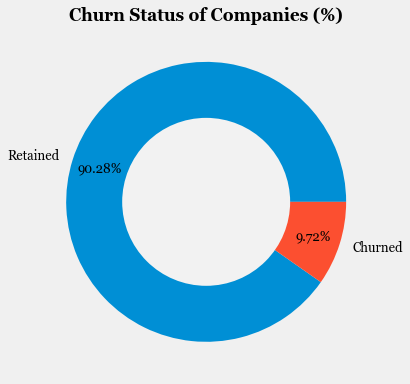

In [47]:
# Churn Status pie-chart
churn_status = churn.Status.value_counts(normalize=True)

pie, ax = plt.subplots(figsize=(6,6))
labels = churn_status.index
patches, texts, autotexts = ax.pie(x=(churn_status), autopct="%.2f%%", labels=labels, pctdistance=0.8, 
                                  startangle=0, textprops={'fontsize': 13})
    
centre_circle = plt.Circle((0,0),0.60,fc='#F2F2F2')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn Status of Companies (%)', fontsize=17, fontweight="bold")

plt.show()

### B) Churn status in Sales Channels

<div class="alert alert-block alert-info">
    <b>
        <li>The 'SC A' Sales channel serves 71.72% (10466) of the companies, followed by 'SC B' with 12.63% (1843). 'SC G' services the least number of companies at 0.01% (2) followed by 'SC F' at 0.02% (3) </li> 
        <li>Companies in 4 of the total 7 Sales Channels have churned.</li>
        <li>Of the 4 Sales Channels the highest churn is seen in Sales Channel 'SC A' (10.54%) where for every 10 companies 1 company churned; followed by Sales Channel 'SC C' (10.04%) where 1 in 10 companies churned, while the lowest churn rate is seen in Sales Channel 'SC B' (5.59%). Sales Channels 'SC E', 'SC F', and 'SC G' have not seen any churn.</li><br>
        <li>Unsurprisingly, 'SC A' has the highest churn since it also represents the most number of companies.</li>
        <li>It would be very helpful to understand the differences in structure and operations of the different Sales Channels in order to understand the reasons for churn.</li>
    </b>
</div>

In [48]:
new_client_df.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    10466
lmkebamcaaclubfxadlmueccxoimlema     1843
usilxuppasemubllopkaafesmlibmsdf     1375
ewpakwlliwisiwduibdlfmalxowmwpci      893
sddiedcslfslkckwlfkdpoeeailfpeds       11
epumfxlbckeskwekxbiuasklxalciiuu        3
fixdbufsefwooaasfcxdxadsiekoceaa        2
Name: channel_sales, dtype: int64

In [49]:
# Subset data
channel = new_client_df[['id', 'channel_sales', 'churn']].copy()
channel.columns = ['Companies', 'Sales_channel', 'Status']

# Abbr. channel sales values
channel.Sales_channel = channel.Sales_channel.str[0:5]
abbr_channel_sales = {'foosd': 'SC A', 'lmkeb': 'SC B', 'usilx': 'SC C', 'ewpak': 'SC D', 'sddie': 'SC E', 'epumf': 'SC F', 'fixdb': 'SC G'}
channel.Sales_channel = channel.Sales_channel.map(abbr_channel_sales)
channel.Sales_channel.value_counts()

SC A    10466
SC B     1843
SC C     1375
SC D      893
SC E       11
SC F        3
SC G        2
Name: Sales_channel, dtype: int64

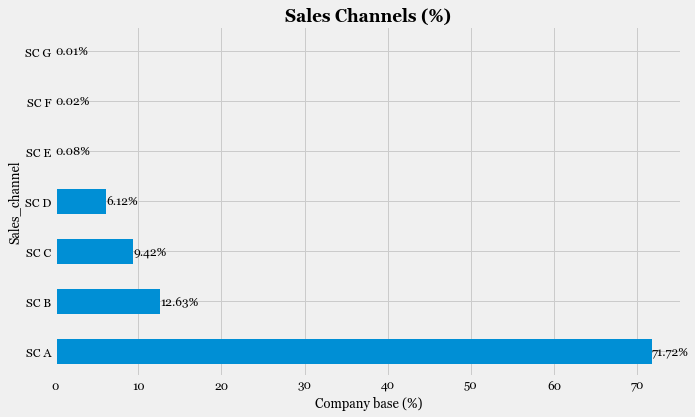

In [50]:
# Sales Channels bar chart
channel_count = channel.Sales_channel.value_counts(normalize=True)
ax = (channel_count*100).plot(kind='barh', figsize=(10,6), rot=0)

# Annotate bars
for c in ax.containers:
    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
# Labels
plt.xlabel("Company base (%)", fontsize=13)
plt.ylabel("Sales_channel", fontsize=13)

# Title
plt.title('Sales Channels (%)', fontsize=17, fontweight="bold")
    
plt.show()

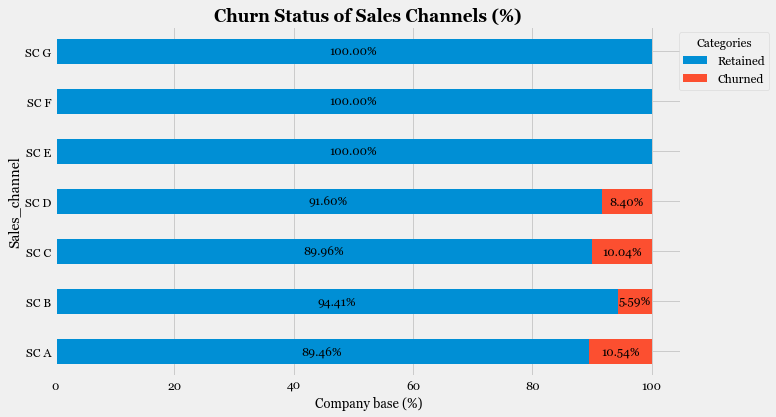

In [51]:
# Churn status bar chart
channel_sales_total = channel.groupby(['Status', 'Sales_channel'])['Companies'].count().unstack()
channel_sales_percentage = (channel_sales_total / channel_sales_total.sum() * 100)
plot_stacked_bars(channel_sales_percentage.transpose(), "Churn Status of Sales Channels (%)", (10, 6), legend_="upper right")

### C) Churn status of Electricity Campaign

<div class="alert alert-block alert-info">
    <b>
        <li>The 'EC A' Electricity Campaign campaigned to 49.07% (7161) of the companies, followed by 'EC B' with 29.43% (4294). 'EC D' and 'EC E' campaigned to the least number of companies at 0.01%.</li>
        <li>Companies in 3 of the total 5 Electricity Campaigns churned.</li>
        <li>Of the 3 Electricity Campaigns the highest churn rate is seen in campaign 'EC A' (12.53%) where 1-2 in 10 companies churned followed by campaign 'EC C' (8.42%), while the lowest churn rate is seen in campaign 'EC B' (6.01%). Sales Channels 'EC E', and 'EC F' have not seen any churn.</li><br>
        <li>Unsurprisingly, 'EC A' has the highest churn since it also the campaign that most number of companies suscribed to</li>
        <li>It would be very helpful to understand the differences in structure and offerings of the different Electricity Campaigns in order to understand the reasons for churn.</li>
    </b>
</div>

In [52]:
new_client_df.origin_up.value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7161
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3135
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [53]:
# Subset data
campaign = new_client_df[['id', 'origin_up', 'churn']].copy()
campaign.columns = ['Companies', 'Electricity_Campaign', 'Status']

# Abbr. channel sales values
campaign.Electricity_Campaign = campaign.Electricity_Campaign.str[0:5]
abbr_electricity_campaign = {'lxidp': 'EC A', 'kamkk': 'EC B', 'ldkss': 'EC C', 'usapb': 'EC D', 'ewxee': 'EC E'}
campaign.Electricity_Campaign = campaign.Electricity_Campaign.map(abbr_electricity_campaign)
campaign.Electricity_Campaign.value_counts()

EC A    7161
EC B    4294
EC C    3135
EC D       2
EC E       1
Name: Electricity_Campaign, dtype: int64

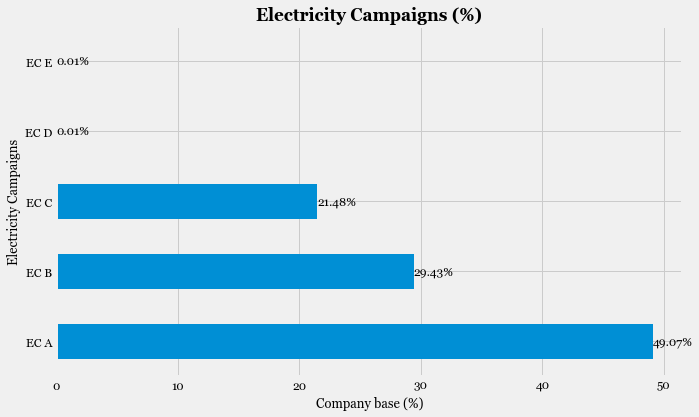

In [54]:
# Electricity campaign bar chart
campaign_count = campaign.Electricity_Campaign.value_counts(normalize=True)
ax = (campaign_count*100).plot(kind='barh', figsize=(10,6), rot=0)

# Annotate bars
for c in ax.containers:
    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
# Labels
plt.xlabel("Company base (%)", fontsize=13)
plt.ylabel("Electricity Campaigns", fontsize=13)

# Title
plt.title('Electricity Campaigns (%)', fontsize=17, fontweight="bold")
    
plt.show()

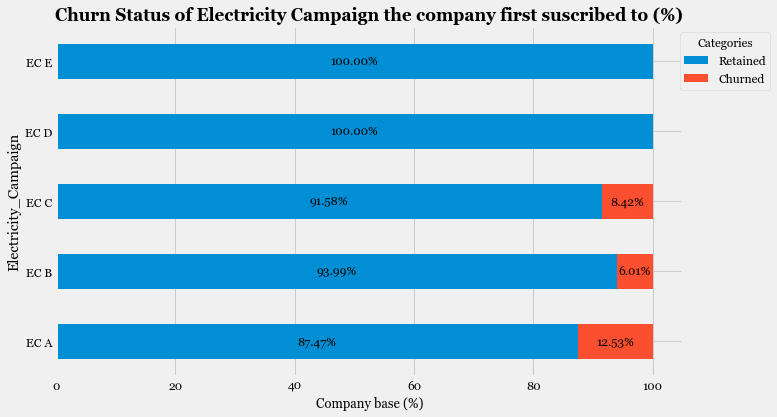

In [55]:
# Churn status bar chart
elec_camp_total = campaign.groupby(['Status', 'Electricity_Campaign'])['Companies'].count().unstack()
elec_camp_percentage = (elec_camp_total / elec_camp_total.sum() * 100)
plot_stacked_bars(elec_camp_percentage.transpose(), "Churn Status of Electricity Campaign the company first suscribed to (%)", (10, 6), legend_="upper right")

### D) Churn of Electricity Campaign with respect to Sales Channels

<div class="alert alert-block alert-info">
    <b>
        <li>There is a lot of difference between churned rates and retained rates of Sales channels 'SC A', 'SC B', 'SC C', and 'SC D' across the different Electricity campaigns.</li><br>       
        <li>Within sales channel SC A - campaign 'EC A' has been least successful at retaining its suscribed customers, while EC B has been the most successful. The difference in 'EC C' is not a lot.</li>
        <li>Sales channel SC B sees a similar pattern - campaign 'EC A' has been least successful at retaining customers with the difference being almost double. 'EC B' has been more successful at retaining customers by almost 18% points. There is no difference in the performance of 'EC C'.</li>
        <li>Sales channel SC C - campaign 'EC A' has been less successful at retaining customers while 'EC B' has been more successful but the differences are just a little over 10% points. The difference in 'EC C' is again quiet small.</li>
         <li>Sales channel SC D - here campaign 'EC C' has been the least successful at retaining customers while 'EC B' has been more successful. The difference in 'EC A' is quiet small.</li><br>
        <li>NOTE: It is important to remember here that the dataset is highly imbalanced.</li>
    </b>
</div>

In [56]:
print(f'{channel.shape}, {campaign.shape}')

(14593, 3), (14593, 3)


In [57]:
# Merge 'channel' and 'campaign' datasets
channel.drop(['Status'], axis=1, inplace=True)

data_merge = channel.merge(campaign, how='left', on='Companies')
data_merge.head()

,Companies,Sales_channel,Electricity_Campaign,Status
0,24011ae4ebbe3035111d65fa7c15bc57,SC A,EC A,1
1,d29c2c54acc38ff3c0614d0a653813dd,SC A,EC B,0
2,764c75f661154dac3a6c254cd082ea7d,SC A,EC B,0
3,bba03439a292a1e166f80264c16191cb,SC B,EC B,0
4,149d57cf92fc41cf94415803a877cb4b,SC A,EC B,0


In [58]:
# Subset churn data
data_churn = data_merge[data_merge.Status == 1]
data_churn.head()

,Companies,Sales_channel,Electricity_Campaign,Status
0,24011ae4ebbe3035111d65fa7c15bc57,SC A,EC A,1
5,1aa498825382410b098937d65c4ec26d,SC C,EC A,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,SC A,EC A,1
25,389bbbe70248fbeecdf9bb1bd0d1da04,SC A,EC A,1
30,44e826a55734d0ca5eeafcae0e991a75,SC A,EC C,1


In [59]:
print(data_churn.shape)

(1419, 4)


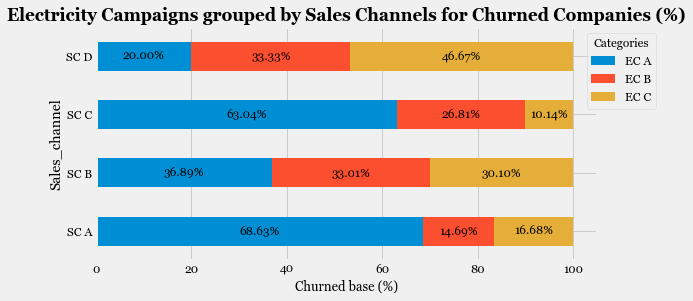

In [60]:
# Churn status bar chart
churn_total = data_churn.groupby(['Electricity_Campaign', 'Sales_channel'])['Companies'].count().unstack()
churn_percentage = (churn_total / churn_total.sum() * 100)

ax = churn_percentage.transpose().plot(kind='barh', stacked=True, figsize=(8,4), rot=0)

# Annotate bars
for c in ax.containers:
    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
    
# Legend
plt.legend(title='Categories', bbox_to_anchor=(1.13, 1), loc='upper right')
    
# Labels
plt.xlabel("Churned base (%)", fontsize=13)
    
# Title
plt.title('Electricity Campaigns grouped by Sales Channels for Churned Companies (%)', fontsize=17, fontweight="bold")
    
plt.show()

In [61]:
# Subset retained data
data_ret = data_merge[data_merge.Status == 0]
data_ret.head()

,Companies,Sales_channel,Electricity_Campaign,Status
1,d29c2c54acc38ff3c0614d0a653813dd,SC A,EC B,0
2,764c75f661154dac3a6c254cd082ea7d,SC A,EC B,0
3,bba03439a292a1e166f80264c16191cb,SC B,EC B,0
4,149d57cf92fc41cf94415803a877cb4b,SC A,EC B,0
7,01495c955be7ec5e7f3203406785aae0,SC A,EC A,0


In [62]:
print(data_ret.shape)

(13174, 4)


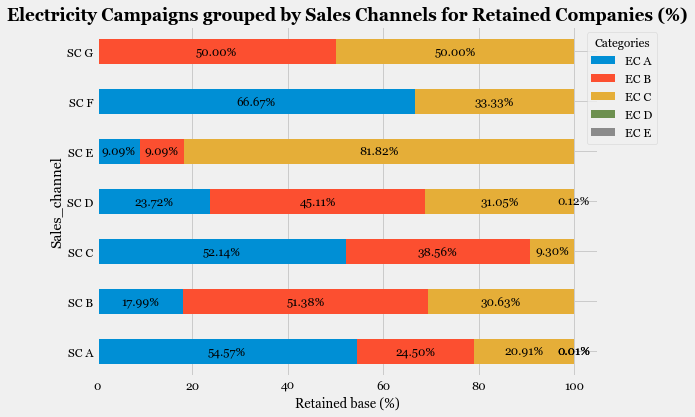

In [63]:
# Churn status bar chart
ret_total = data_ret.groupby(['Electricity_Campaign', 'Sales_channel'])['Companies'].count().unstack()
ret_percentage = (ret_total / ret_total.sum() * 100)

ax = ret_percentage.transpose().plot(kind='barh', stacked=True, figsize=(8,6), rot=0)

# Annotate bars
for c in ax.containers:
    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
    
# Legend
plt.legend(title='Categories', bbox_to_anchor=(1.13, 1), loc='upper right')
    
# Labels
plt.xlabel("Retained base (%)", fontsize=13)
    
# Title
plt.title('Electricity Campaigns grouped by Sales Channels for Retained Companies (%)', fontsize=17, fontweight="bold")
    
plt.show()

### E) Churn status based on Gas status

<div class="alert alert-block alert-info">
    <b>
        <li>Only 18.15% (2,649) of customers also suscribe to a Gas plan. Majority are non-gas customers (11944).</li> 
        <li>The difference in churn rates between the two groups are very similar (less than 2% points). Hence, being a Gas or a Non-Gas client doesn't seem to influence the decision to churn.</li>
    </b>
</div>

In [64]:
new_client_df.has_gas.value_counts()

f    11944
t     2649
Name: has_gas, dtype: int64

In [65]:
# Subset data
gas = new_client_df[['id', 'has_gas', 'churn']].copy()
gas.columns = ['Companies', 'Gas_status', 'Status']
gas.head()

,Companies,Gas_status,Status
0,24011ae4ebbe3035111d65fa7c15bc57,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,f,0
2,764c75f661154dac3a6c254cd082ea7d,f,0
3,bba03439a292a1e166f80264c16191cb,f,0
4,149d57cf92fc41cf94415803a877cb4b,f,0


In [66]:
gas.Gas_status.replace({'t': 'Gas Customers', 'f': 'Non-Gas Customers'}, inplace=True)
gas.head()

,Companies,Gas_status,Status
0,24011ae4ebbe3035111d65fa7c15bc57,Gas Customers,1
1,d29c2c54acc38ff3c0614d0a653813dd,Non-Gas Customers,0
2,764c75f661154dac3a6c254cd082ea7d,Non-Gas Customers,0
3,bba03439a292a1e166f80264c16191cb,Non-Gas Customers,0
4,149d57cf92fc41cf94415803a877cb4b,Non-Gas Customers,0


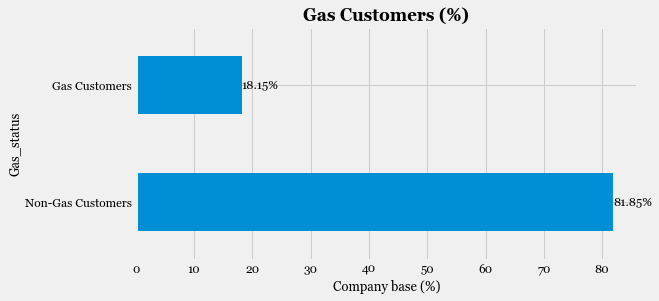

In [67]:
# Gas status bar chart
gas_count = gas.Gas_status.value_counts(normalize=True)
ax = (gas_count*100).plot(kind='barh', figsize=(8,4), rot=0)

# Annotate bars
for c in ax.containers:
    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
# Labels
plt.xlabel("Company base (%)", fontsize=13)
plt.ylabel("Gas_status", fontsize=13)

# Title
plt.title('Gas Customers (%)', fontsize=17, fontweight="bold")
    
plt.show()

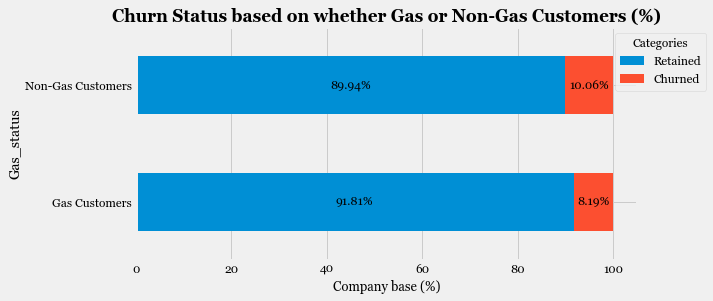

In [68]:
# Churn status bar chart
gas_total = gas.groupby(['Status', 'Gas_status'])['Companies'].count().unstack()
gas_percentage = (gas_total / gas_total.sum() * 100)
plot_stacked_bars(gas_percentage.transpose(), "Churn Status based on whether Gas or Non-Gas Customers (%)", (8, 4), legend_="upper right")

### F) Churn status wrt active products and services

<div class="alert alert-block alert-info">
    <b>
        <li>~78.26% (11,421 out of 14,593) of companies suscribed to only 1 product or service followed by ~17% (2,445) at 2 products and services and ~4% (521) at 3 products and services.</li>
        <li>Only 0.18% (26)of companies have suscribed to more than 5 products and services.</li><br>
        <li>Churn is only seen in companies that have suscribed to 5 or less products and services. This is unsurprising since more than ~99% of the companies fall in these categories.</li>
        <li>The churn rate of these companies that have suscribed to 5 or less products and services is very similar. Hence, we can say that the number of products and services that a company has suscribed to doesn't influence the decision to churn.</li>
    </b>
</div>

In [69]:
new_client_df.nb_prod_act.value_counts()

1     11421
2      2444
3       521
4       150
5        31
9        11
6         8
8         4
10        2
32        1
Name: nb_prod_act, dtype: int64

In [70]:
# Subset data
prod = new_client_df[['id', 'nb_prod_act', 'churn']].copy()
prod.columns = ['Companies', 'Act_prod', 'Status']
prod.head()

,Companies,Act_prod,Status
0,24011ae4ebbe3035111d65fa7c15bc57,2,1
1,d29c2c54acc38ff3c0614d0a653813dd,1,0
2,764c75f661154dac3a6c254cd082ea7d,1,0
3,bba03439a292a1e166f80264c16191cb,1,0
4,149d57cf92fc41cf94415803a877cb4b,1,0


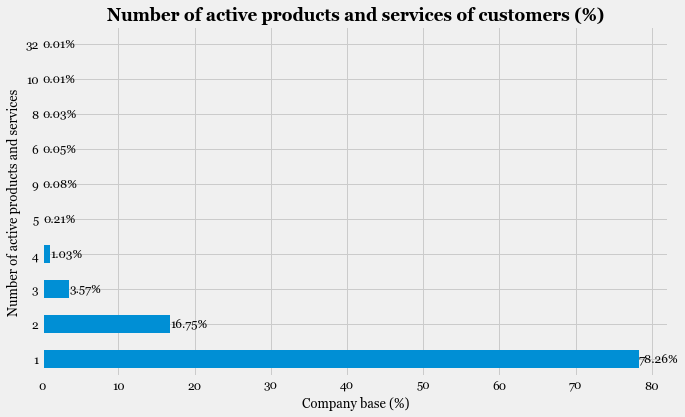

In [71]:
# Active Products status bar chart
prod_count = prod.Act_prod.value_counts(normalize=True)
ax = (prod_count*100).plot(kind='barh', figsize=(10,6), rot=0)

# Annotate bars
for c in ax.containers:
    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
# Labels
plt.xlabel("Company base (%)", fontsize=13)
plt.ylabel("Number of active products and services", fontsize=13)

# Title
plt.title('Number of active products and services of customers (%)', fontsize=17, fontweight="bold")
    
plt.show()

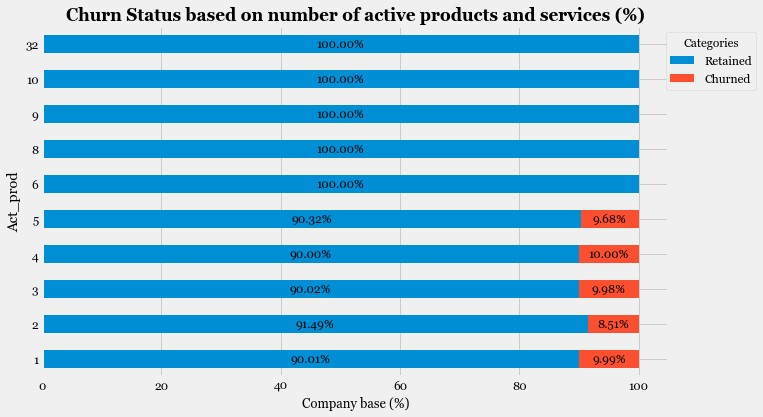

In [72]:
# Churn status bar chart
prod_total = prod.groupby(['Status', 'Act_prod'])['Companies'].count().unstack()
prod_percentage = (prod_total / prod_total.sum() * 100)
plot_stacked_bars(prod_percentage.transpose(), "Churn Status based on number of active products and services (%)", (10, 6), legend_="upper right")

### G) Churn based on Antiquity of the client (how long the customer has been with the company)

<div class="alert alert-block alert-info">
    <b>
        <li>92.5% (13,498 out of 14,593) of companies have been with PowerCo for 3-6 years - the highest being 6 yrs with ~33% (4766) followed by 4 yrs with ~27% (3982). Only 1 company has been with PowerCo for 1 year and only 11 have been with PowerCo for 2 years.</li>
        <li>~8% (1,083)of companies have been long-time customers of 7-13 years.</li>
        <li>It would be beneficial to understand what factors have led to long-term loyalty to PowerCo.</li>
        <li>There is a drastic fall in number of companies after 6 years.</li><br>
        <li>Highest churn of ~27% is seen in companies who have been with PowerCo for 2 years and then churned. Considering, that there are only 11 such companies in the dataset, that would be 3 in 10 companies that have churned.</li>
        <li>The churn rate drastically reduces from 27% to ~14% from year 3. It would be beneficial to understand the factors that lead to such high churn in year 2.
        <li>Interestingly, there is a higher difference in the churn rates every 2 years as compared to the previous year, although this pattern is not consistant after year 6.</li> 
        <li>The churn rate reduces as the number of years with PowerCo increases until 6 years, there is a slight ~1% point increase in year 7, but starts decreasing again in year 8 and year 9. The churn rate again starts increasing after 9 years with the company.</li>
    </b>
</div>

In [73]:
new_client_df.num_years_antig.value_counts()

6     4766
4     3982
3     2433
5     2317
7      503
11     185
12     110
8       99
9       92
10      81
13      13
2       11
1        1
Name: num_years_antig, dtype: int64

In [74]:
# Subset data
year = new_client_df[['id', 'num_years_antig', 'churn']].copy()
year.columns = ['Companies', 'Num_years', 'Status']
year.head()

,Companies,Num_years,Status
0,24011ae4ebbe3035111d65fa7c15bc57,3,1
1,d29c2c54acc38ff3c0614d0a653813dd,6,0
2,764c75f661154dac3a6c254cd082ea7d,6,0
3,bba03439a292a1e166f80264c16191cb,6,0
4,149d57cf92fc41cf94415803a877cb4b,6,0


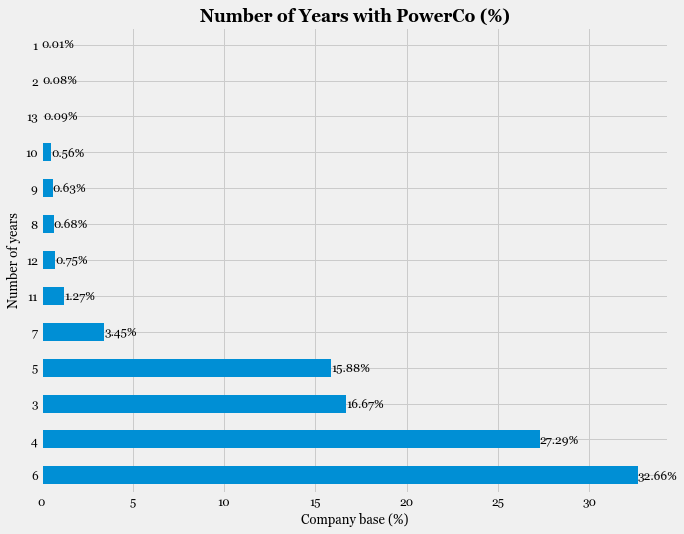

In [75]:
# Active Products status bar chart
year_count = year.Num_years.value_counts(normalize=True)
ax = (year_count*100).plot(kind='barh', figsize=(10,8), rot=0)

# Annotate bars
for c in ax.containers:
    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
# Labels
plt.xlabel("Company base (%)", fontsize=13)
plt.ylabel("Number of years", fontsize=13)

# Title
plt.title('Number of Years with PowerCo (%)', fontsize=17, fontweight="bold")
    
plt.show()

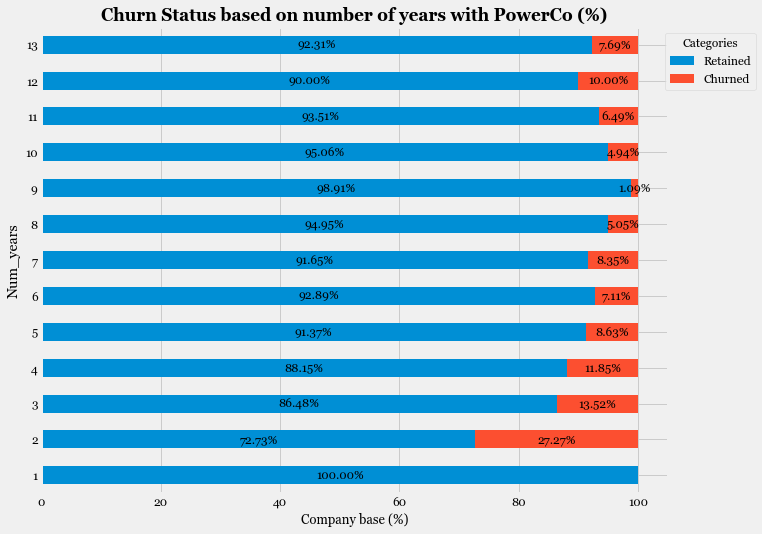

In [76]:
# Churn status bar chart
year_total = year.groupby(['Status', 'Num_years'])['Companies'].count().unstack()
year_percentage = (year_total / year_total.sum() * 100)
plot_stacked_bars(year_percentage.transpose(), "Churn Status based on number of years with PowerCo (%)", (10, 8), legend_="upper right")

### H) Churn based on Consumption

<div class="alert alert-block alert-info">
    <b>
        <li>Descriptive Statistics for each of the variables - 'Electricity consumption for past 12 months', 'Gas consumption for last 12 months', 'Electricity consumption for last month', and 'Current paid consumption' show that the mean consumption of all variables is above the consumption of 75 percentile of the observations.</li>
        <li>This also means that the variables are rightly skewed with a lot of outliers to the right. The box plots for each variable also proves this phenomenon.</li><br>
        <li>We may have to standardize the variables to eliminate the effect of the outliers.</li>
        <li>Overall, churn rate decreases as consumption increases. This means that companies leaving PowerCo are more likely to be on the lower end of the consumption spectrum.</li><br>
        ELECTRICITY CONSUMPTION FOR LAST 12 MONTHS:
        <li>The histogram shows churn rate is higher in consumptions below the median consumption. The churn rate reduces as the consumption increases.</li>
        <li>This same pattern is also observed in consumptions that are larger than the mean consumption value. The churn rate is higher in consumptions nearer to the mean consumption and decreases as the consumption values move towards the maximum observed consumption value.</li><br>
        GAS CONSUMPTION FOR LAST 12 MONTHS: 
        <li>A similar pattern is observed in clients that also suscribe to gas. The histogram shows a higher churn rate for consumptions below the median consumption. The churn rate reduces as the consumption increases. Similarly, for observations above the mean consumption value, the churn rate is higher in consumptions nearer to the mean consumption and decreases and is almost negligible towards the maximum observed value.</li><br>
        ELECTRICITY CONSUMPTION IN LAST MONTH:
        <li>The histogram shows that the churn rate is higher between the 25th percentile and median, i.e. more companies churned whose consumption was lesser than the median consumption. Similarly, for observations above the mean consumption value, the churn rate is higher in consumptions nearer to the mean consumption and decreases and is almost negligible towards the maximum observed value.</li><br>
        CURRENT PAID CONSUMPTION:
        <li>The churn rate is higher around the median consumption. Similarly, for observations above the mean consumption value, the churn rate is higher in consumptions nearer to the mean consumption and decreases towards the maximum observed value.</li><br>
        SUSCRIBED POWER:
        <li>The pattern here is similar to the above variables. The churn rate decreases as the suscribed power increases and is higher for suscribed power less than the median.</li><br>
    </b>
</div>

In [77]:
# Subset consumption data
consumption = new_client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'has_gas', 'imp_cons', 'pow_max', 'churn']].copy()
consumption.columns = ['Companies', 'elec_12m', 'gas_12m', 'elec_last_month', 'has_gas', 'paid_cons', 'suscribed_pow', 'Status']
consumption.head()

,Companies,elec_12m,gas_12m,elec_last_month,has_gas,paid_cons,suscribed_pow,Status
0,24011ae4ebbe3035111d65fa7c15bc57,14287.0,54946.0,2212.0,t,159.96,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660.0,0.0,2212.0,f,159.96,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,544.0,0.0,2212.0,f,159.96,13.856,0
3,bba03439a292a1e166f80264c16191cb,1584.0,0.0,2212.0,f,159.96,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,4425.0,0.0,526.0,f,52.32,19.800,0


In [78]:
# Subset only electricity customers
elec_only_cust = consumption[consumption.has_gas == 'f']
print(f'Only electricity customers:{elec_only_cust.shape}')

# Subset both electricity and gas customers
elec_gas_cust = consumption[consumption.has_gas == 't']
print(f'Both electricity and gas customers:{elec_gas_cust.shape}')

Only electricity customers:(11944, 8)
Both electricity and gas customers:(2649, 8)


#### H1) Electricity consumption past 12 months (all customers)

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    1.459300e+04
mean     1.594639e+05
std      5.736739e+05
min      1.000000e+00
25%      5.836000e+03
50%      1.428700e+04
75%      4.078300e+04
max      6.207104e+06
Name: elec_12m, dtype: float64


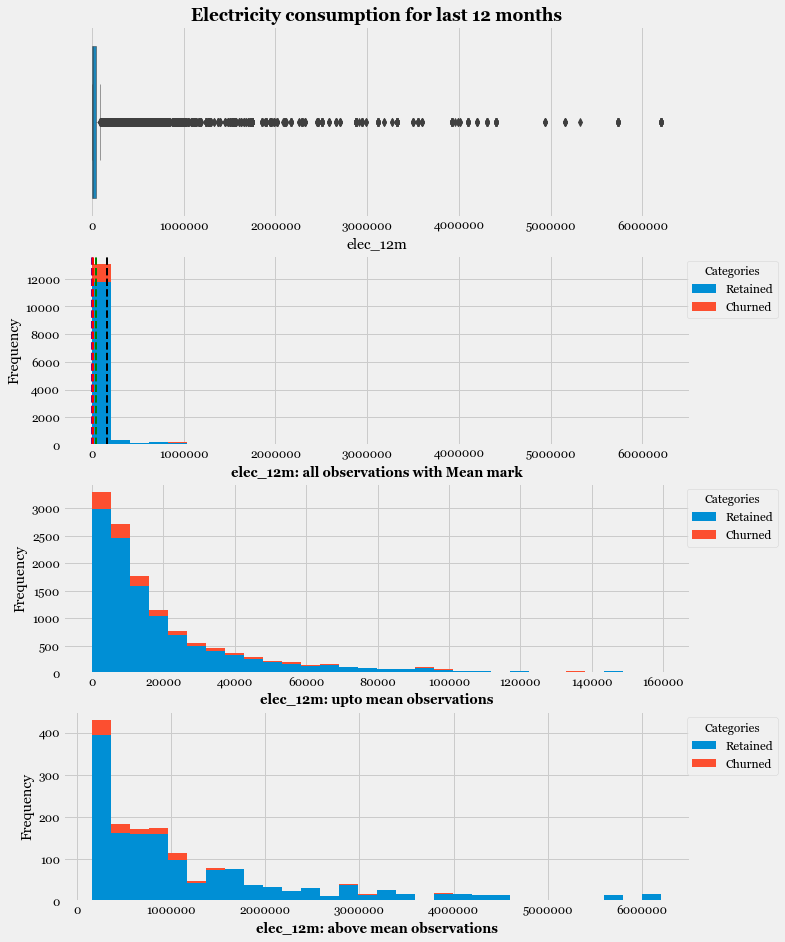

In [79]:
# Electricity consumption past 12 months (all customers)
plot_box_hist(consumption, 'elec_12m', 'Electricity consumption for last 12 months', 30, (10, 15))

#### H2) Gas consumption past 12 months (gas and electric customers only)

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    2.649000e+03
mean     1.533863e+05
std      3.555544e+05
min      1.100000e+01
25%      6.646000e+03
50%      2.040300e+04
75%      8.776500e+04
max      4.154590e+06
Name: gas_12m, dtype: float64


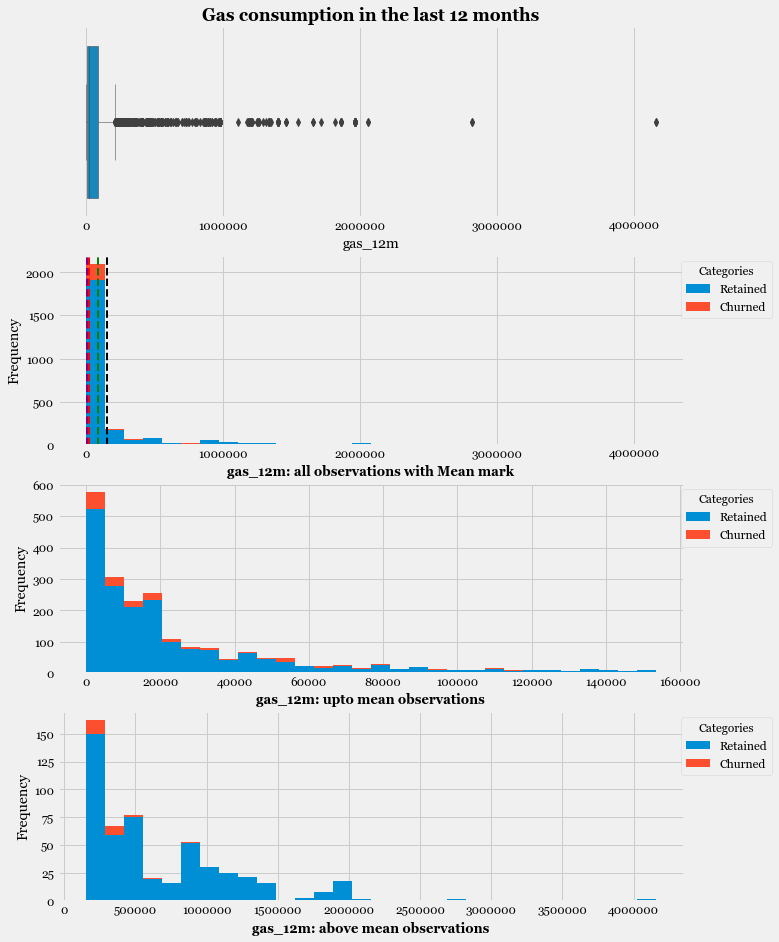

In [80]:
# Gas consumption past 12 months (gas and electric customers only)
plot_box_hist(elec_gas_cust, 'gas_12m', 'Gas consumption in the last 12 months', 30, (10,15))

#### H3) Electric consumption past month (all customers)

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     14593.000000
mean      16857.953813
std       64210.919395
min           1.000000
25%        1395.000000
50%        2212.000000
75%        3384.000000
max      771203.000000
Name: elec_last_month, dtype: float64


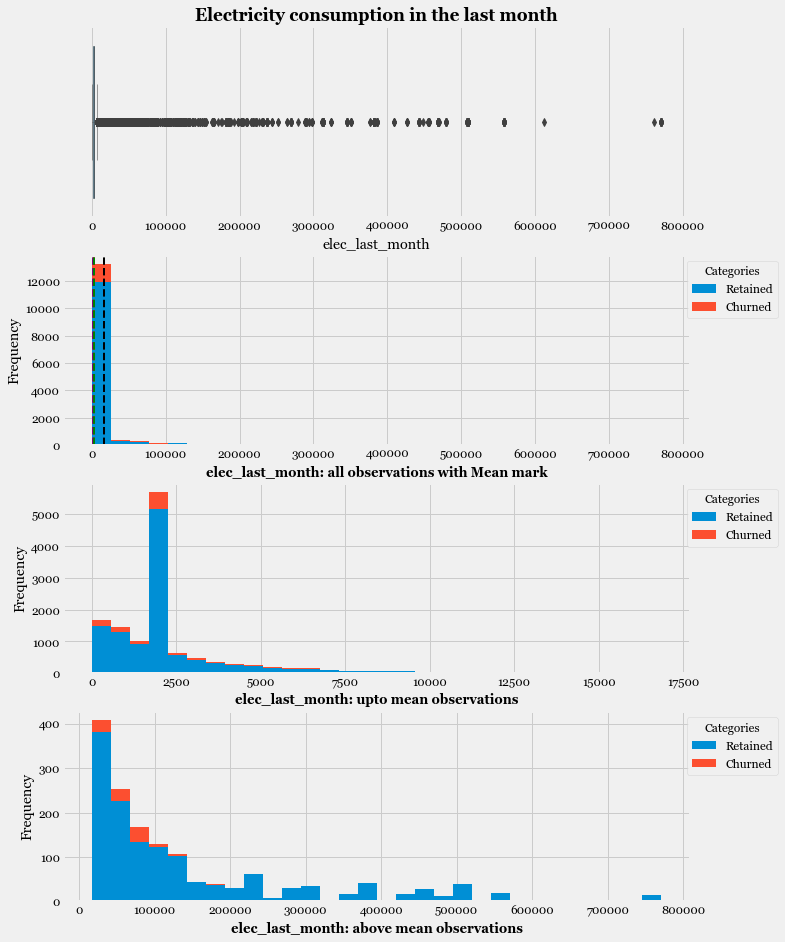

In [81]:
# Electric consumption past month (all customers)
plot_box_hist(consumption, 'elec_last_month', 'Electricity consumption in the last month', 30, (10,15))

#### H4) Current paid consumption (all customers)

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean       220.401505
std        319.714785
min          0.060000
25%        131.670000
50%        159.960000
75%        194.150000
max      15042.790000
Name: paid_cons, dtype: float64


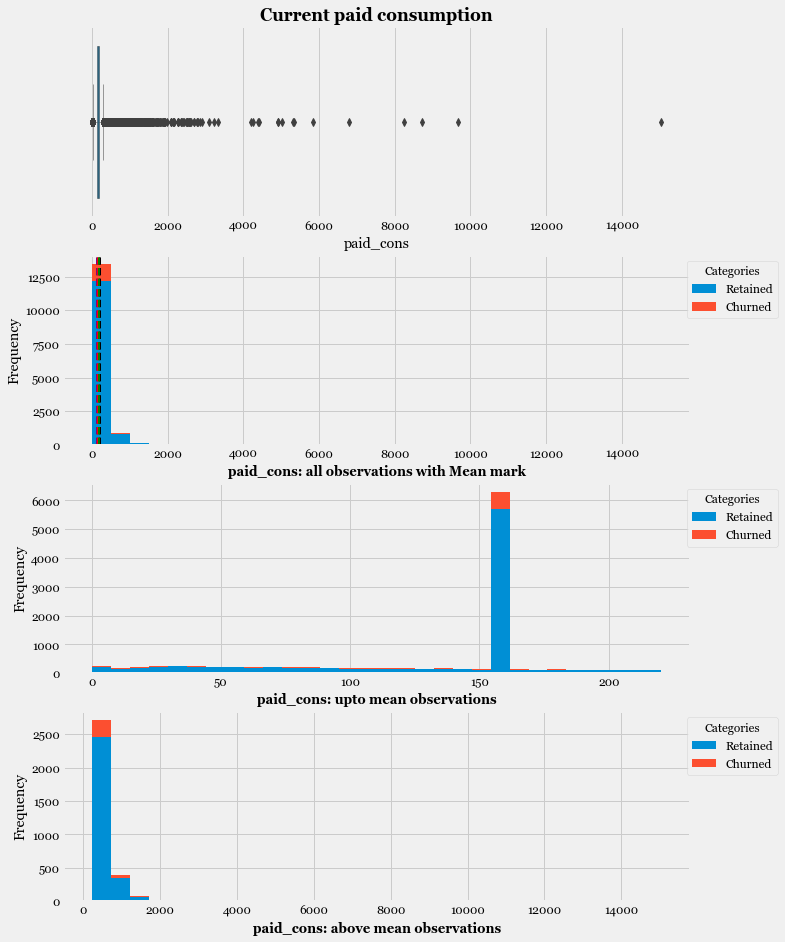

In [82]:
# Current paid consumption (all customers)
plot_box_hist(consumption, 'paid_cons', 'Current paid consumption', 30, (10,15))

#### H5) Suscribed power

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean        18.133966
std         13.538509
min          3.300000
25%         12.500000
50%         13.856000
75%         19.050000
max        320.000000
Name: suscribed_pow, dtype: float64


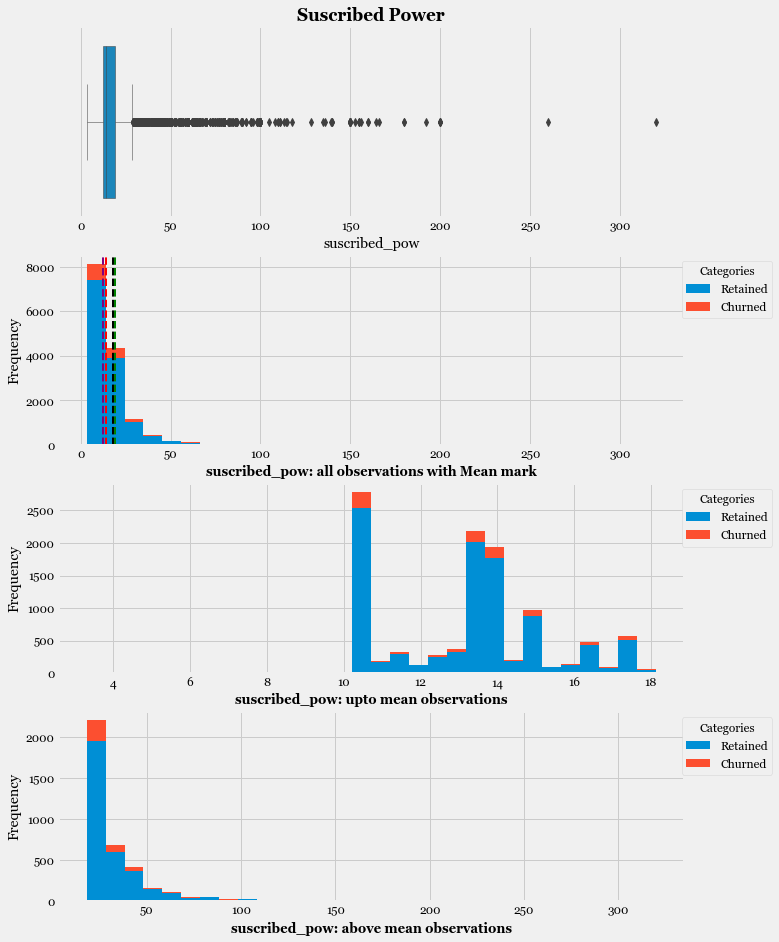

In [83]:
# Suscribed power (all customers)
plot_box_hist(consumption, 'suscribed_pow', 'Suscribed Power', 30, (10,15))

### I) Churn based on Forecast

<div class="alert alert-block alert-info">
    <b>
        <li>Descriptive Statistics for each of the forecasted consumption factors - 'Forecasted electricity consumption for next 12 months', and 'Forecasted electricity consumption for next calendar year', show patterns similar to actual consumption. The churn decreases as consumption values increase.</li>
        <li>Descriptive Statistics for each of the price factors - 'Forecasted energy price off-peak', 'Forecasted energy price peak', and 'Forecasted power price off-peak' show that there are more companies paying above the mean price and the churn rate is higher in companies above the mean price.</li><br>
        FORECASTED ELECTRICITY CONSUMPTION FOR NEXT 12 MONTHS:
        <li>The histograms show churn decreases as consumption increases above the median forecasted consumption. This is also true for companies whose forecasted consumption is higher than the mean consumption</li><br>
        FORECASTED ELECTRICITY CONSUMPTION FOR NEXT CALENDAR YEAR:
        <li>The histograms shows that the churn is the highest just after the median forecasted consumption.</li><br>
        FORECASTED VALUE OF CURRENT DISCOUNT:
        <li>Most of the companies have almost no discount.</li>
        <li>Surprisingly, the few companies that do have a forecasted discount value way higher than the mean value and towards the max value - the churn rate increases as the discount value increases. This could be an indication that not every company will value a discount and not churn.</li><br>
        FORECASTED BILL OF METER RENTAL FOR THE NEXT 12 MONTHS:
        <li>The churn rate increases as the rental value increases and then decreases after the median value mark.</li><br>
        FORECASTED ENERGY PRICE OFF-PEAK:
        <li>Most of the companies forecasted off-peak energy price is above the mean value.</li>
        <li>Cumulatively, the churn is higher above the mean value of \$0.13.</li><br>
        FORECASTED ENERGY PRICE PEAK:
        <li>Most of the companies forecasted peak energy price is above the mean value of \$0.10.</li>
        <li>The histograms show that as the peak price increases the churn increases.</li><br>
        FORECASTED POWER PRICE OFF-PEAK:
        <li>Majority of the companies forecasted off-peak power price is above the mean value of \$43.40.</li>
        <li>Cumulatively, the churn is higher in companies paying above the mean price.</li><br>
        <li>Overall, the histograms of the price variables give us the first indication of price sensitivity. But there would need to be some more investigations particularly with historic pricing.</li>
    </b>
</div>

In [84]:
# Subset forecast data
forecast = new_client_df[['id', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'churn']].copy()
forecast.columns = ['Companies', 'for_elec_12m', 'for_elec_year', 'for_val_disc', 'for_rent_12m', 'for_price_ene_offpeak', 'for_price_ene_peak', 'for_price_pow_offpeak', 'Status']
forecast.head()

,Companies,for_elec_12m,for_elec_year,for_val_disc,for_rent_12m,for_price_ene_offpeak,for_price_ene_peak,for_price_pow_offpeak,Status
0,24011ae4ebbe3035111d65fa7c15bc57,1149.83,1395.5,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,1395.5,0.0,16.27,0.145711,0.098837,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,1395.5,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,1395.5,0.0,19.83,0.146694,0.098837,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526.0,0.0,131.73,0.116900,0.100015,40.606701,0


#### I1) Forecasted electricity consumption next 12 months

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean      1893.365937
std       2375.313674
min          0.100000
25%        535.550000
50%       1149.830000
75%       2403.620000
max      82902.830000
Name: for_elec_12m, dtype: float64


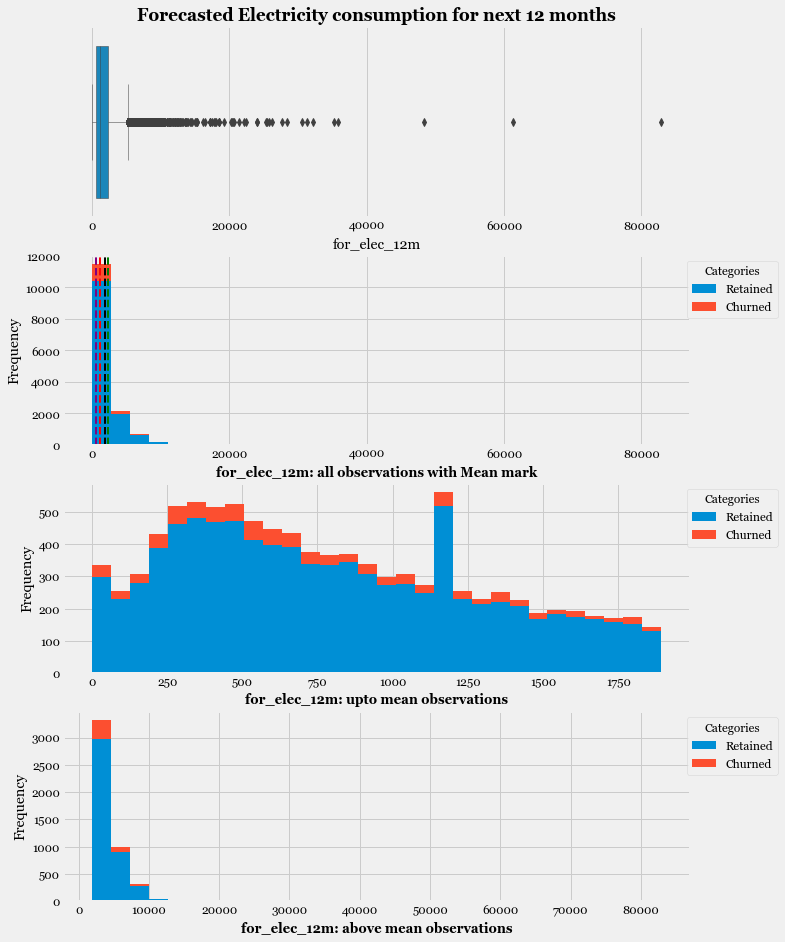

In [85]:
# Forecasted electricity consumption next 12 months
plot_box_hist(forecast, 'for_elec_12m', 'Forecasted Electricity consumption for next 12 months', 30, (10,15))

#### I2) Forecasted electricity consumption next calendar year

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     14593.000000
mean       1987.687898
std        3063.710212
min           1.000000
25%        1122.000000
50%        1395.500000
75%        1747.000000
max      175375.000000
Name: for_elec_year, dtype: float64


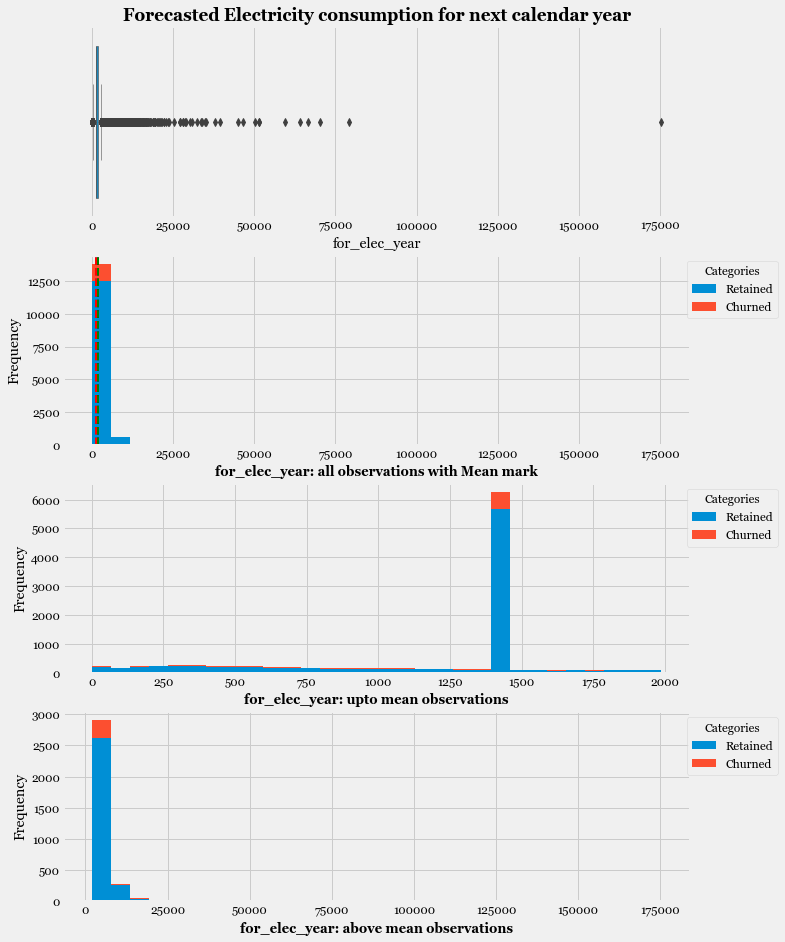

In [86]:
# Forecasted electricity consumption next calendar year
plot_box_hist(forecast, 'for_elec_year', 'Forecasted Electricity consumption for next calendar year', 30, (10,15))

#### I3) Forecasted value of current discount

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean         0.967587
std          5.110482
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: for_val_disc, dtype: float64


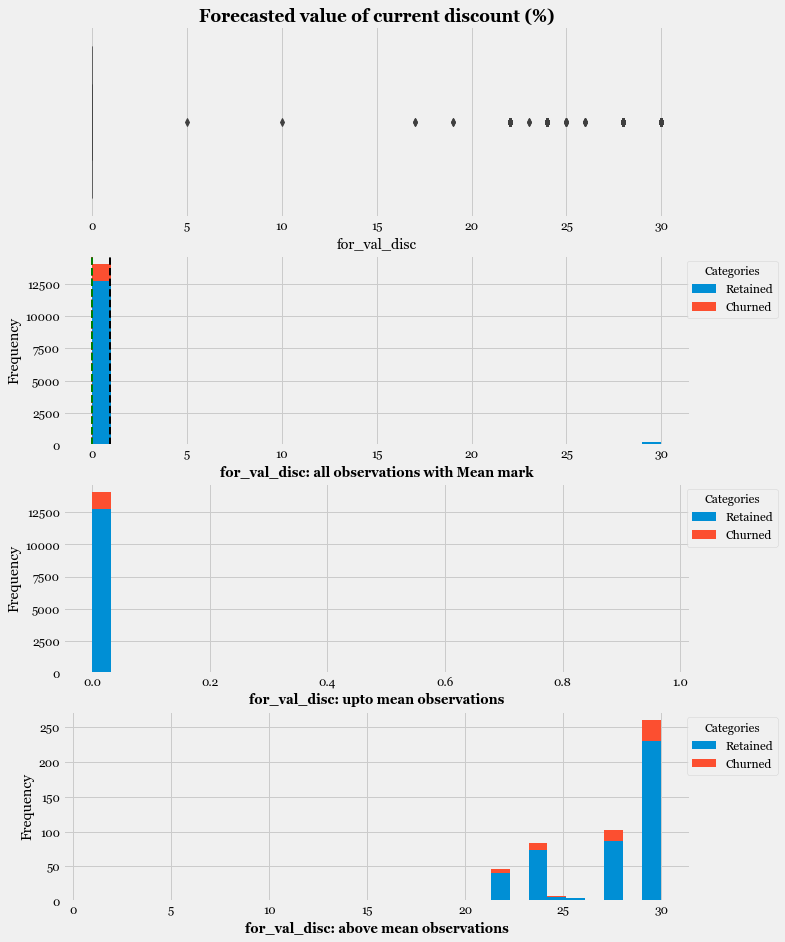

In [87]:
# Forecasted value of current discount
plot_box_hist(forecast, 'for_val_disc', 'Forecasted value of current discount (%)', 30, (10,15))

#### I4) Forecasted bill of meter rental for the next 12 months

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean        63.968866
std         65.313661
min          0.090000
25%         16.370000
50%         19.430000
75%        131.020000
max        599.310000
Name: for_rent_12m, dtype: float64


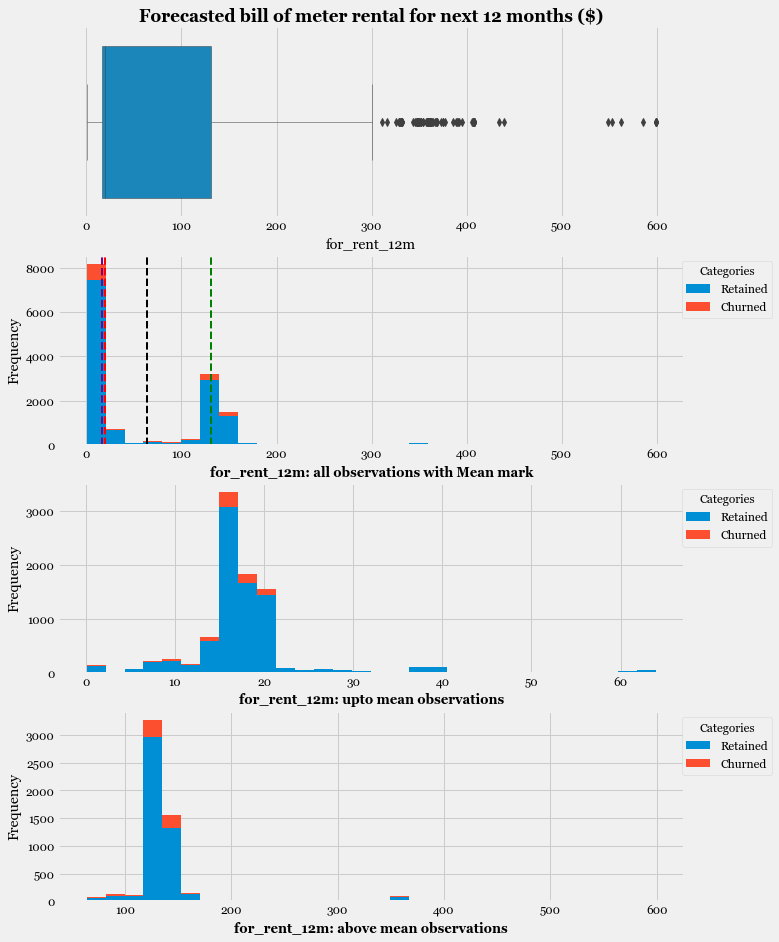

In [88]:
# Forecasted bill of meter rental for the next 12 months
plot_box_hist(forecast, 'for_rent_12m', 'Forecasted bill of meter rental for next 12 months ($)', 30, (10,15))

#### I5) Forecasted energy price for off peak

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean         0.137539
std          0.024013
min          0.000600
25%          0.116340
50%          0.143166
75%          0.146348
max          0.273963
Name: for_price_ene_offpeak, dtype: float64


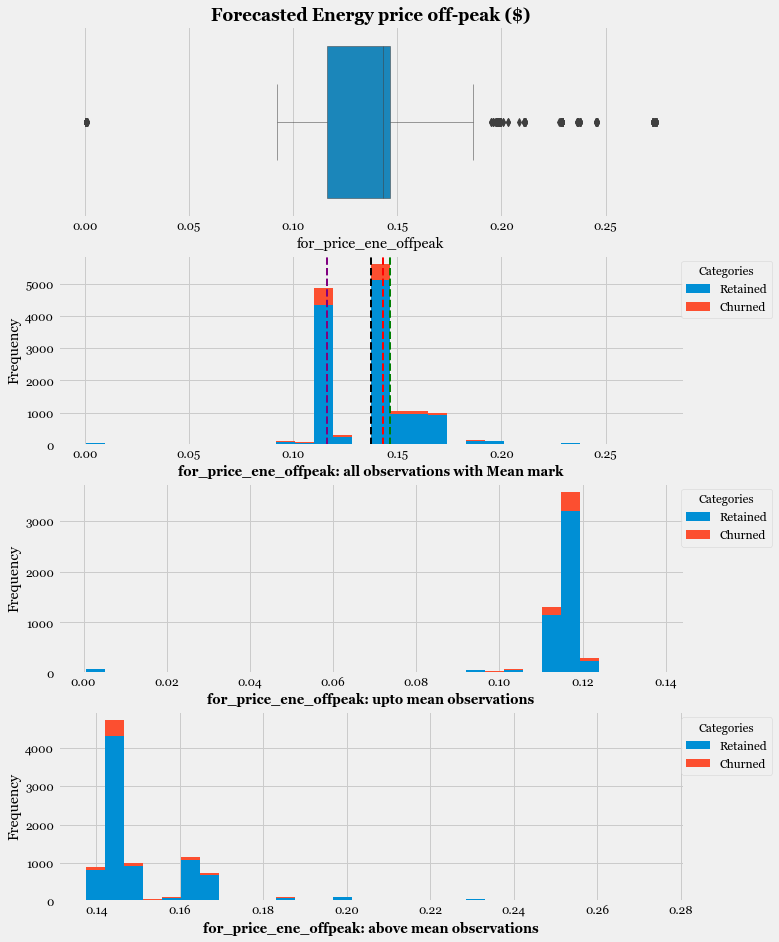

In [89]:
# Forecasted energy price for off peak
plot_box_hist(forecast, 'for_price_ene_offpeak', 'Forecasted Energy price off-peak ($)', 30, (10,15))

#### I6) Forecasted energy price for peak

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean         0.098011
std          0.006725
min          0.076592
25%          0.098837
50%          0.098837
75%          0.098837
max          0.195975
Name: for_price_ene_peak, dtype: float64


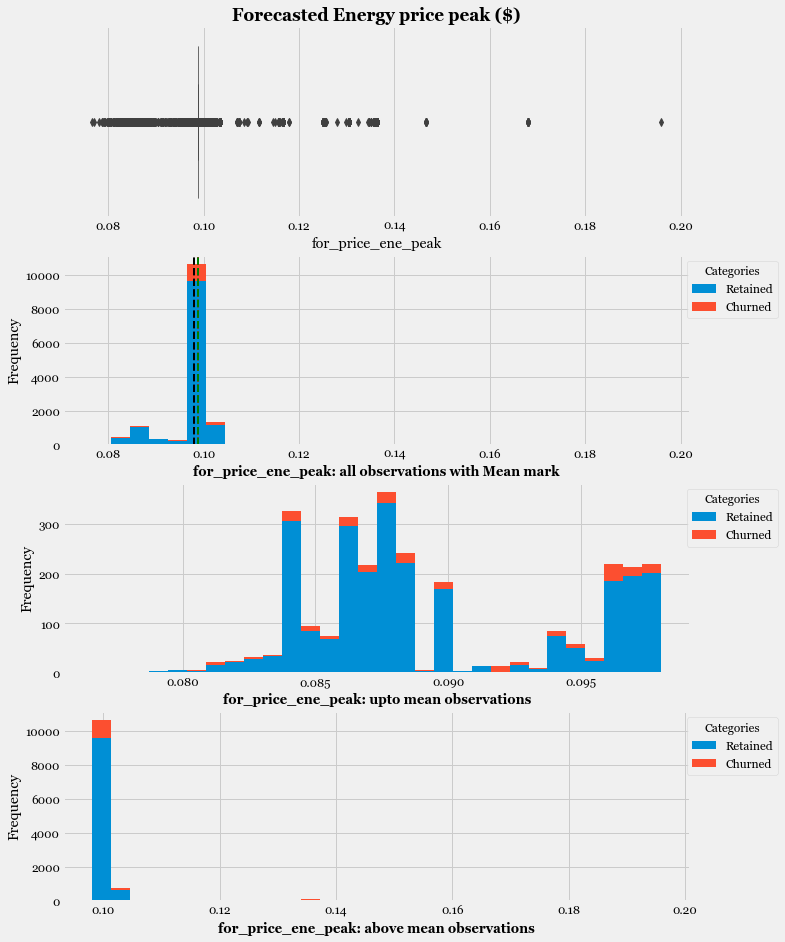

In [90]:
# Forecasted energy price for peak
plot_box_hist(forecast, 'for_price_ene_peak', 'Forecasted Energy price peak ($)', 30, (10,15))

#### I7) Forecasted power price off-peak

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean        43.401193
std          2.804456
min         35.555768
25%         40.606701
50%         44.311378
75%         44.311378
max         59.266378
Name: for_price_pow_offpeak, dtype: float64


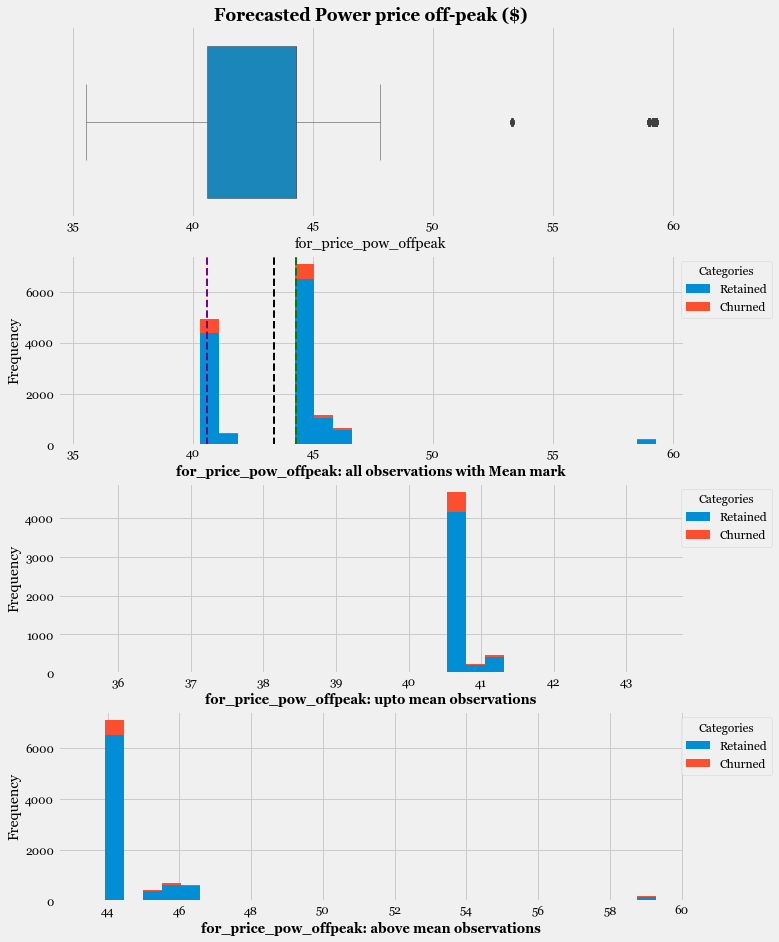

In [91]:
# Forecasted power price for off-peak
plot_box_hist(forecast, 'for_price_pow_offpeak', 'Forecasted Power price off-peak ($)', 30, (10,15))

### J) Churn based on Margins

<div class="alert alert-block alert-info">
    <b>
        <li>Descriptive Statistics for each of the margin factors show that mean and median margins are very close to each other.</li>
        <li>There are some extreme outliers to the right.</li><br>
        GROSS MARGIN ON POWER SUBSCRIPTION:
        <li>The histograms show churn decreases as margins increase above the mean gross margin, but churn sort off increases as margin increases below the mean gross margin - i.e. overall churn is higher in companies closer to the average gross margins.</li><br>
        NET MARGIN ON POWER SUBSCRIPTION:
        <li>The histograms follow the same patterns as the gross margins.</li><br>
        TOTAL NET MARGINS:
        <li>The total net margins from most of the companies fall above the total mean net margins.</li>
        <li>Overall a lot of companies that churn provide total net margins above the mean net margin.</li>
    </b>
</div>

In [92]:
# Subset margin data
margin = new_client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'churn']].copy()
margin.columns = ['Companies', 'gross_pow', 'net_pow', 'tot_net', 'Status']
margin.head()

,Companies,gross_pow,net_pow,tot_net,Status
0,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99,1
1,d29c2c54acc38ff3c0614d0a653813dd,16.38,16.38,18.89,0
2,764c75f661154dac3a6c254cd082ea7d,28.60,28.60,6.60,0
3,bba03439a292a1e166f80264c16191cb,30.22,30.22,25.46,0
4,149d57cf92fc41cf94415803a877cb4b,44.91,44.91,47.98,0


#### J1) Gross margin on power subscription

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean        24.801924
std         20.079661
min          0.030000
25%         14.640000
50%         21.780000
75%         29.880000
max        374.640000
Name: gross_pow, dtype: float64


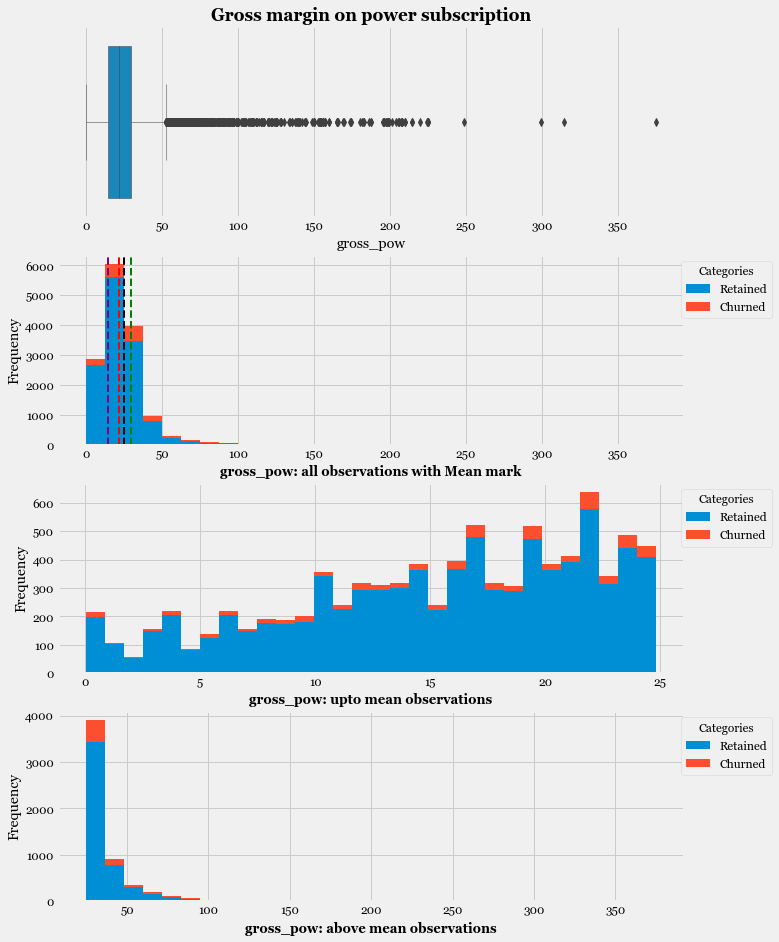

In [93]:
# Gross margin on power subscription
plot_box_hist(margin, 'gross_pow', 'Gross margin on power subscription', 30, (10,15))

#### J2) Net margin on power subscription

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean        24.799318
std         20.078792
min          0.030000
25%         14.640000
50%         21.780000
75%         29.880000
max        374.640000
Name: net_pow, dtype: float64


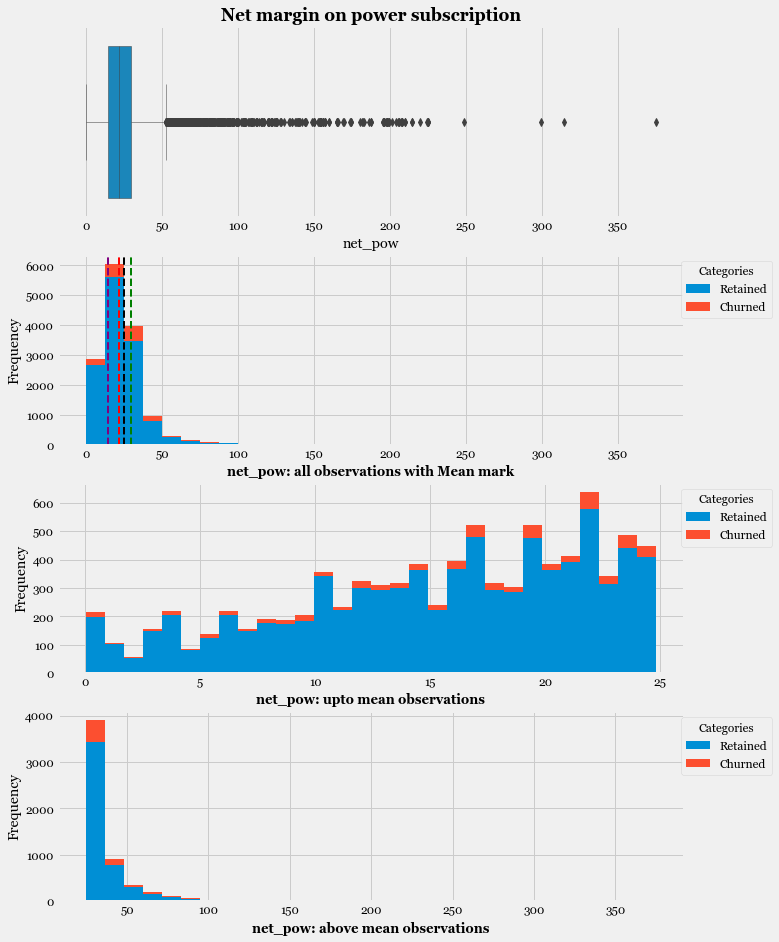

In [94]:
# Net margin on power subscription
plot_box_hist(margin, 'net_pow', 'Net margin on power subscription', 30, (10,15))

#### J3) Total Net margin 

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    14593.000000
mean       190.784563
std        311.309870
min          0.010000
25%         53.190000
50%        114.660000
75%        243.350000
max      24570.650000
Name: tot_net, dtype: float64


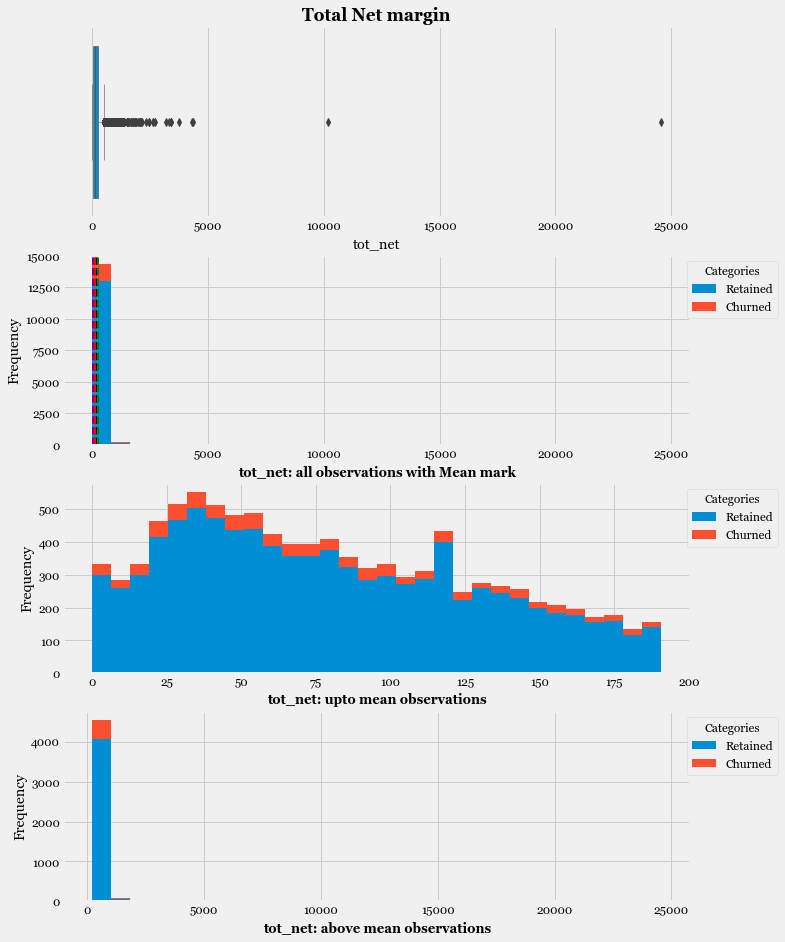

In [95]:
# Total net margin 
plot_box_hist(margin, 'tot_net', 'Total Net margin', 30, (10,15))

## SUB-TASK 2
### K) Churn based on historic pricing

<div class="alert alert-block alert-info">
    <b>
        <li>A majority of the price variables have 45%-60% zero values.Price cannot be 0, hence these are most probably missing values. We will trim/remove the bottom 5% of the observations instead of replacing the 0 values with either mean or median as doing so may skew the results and lead to incorrect interpretations.</li>
        <li>Descriptive Statistics for each of the price factors show that churn occurs above the mean price.</li>
        <li>Overall, the histograms and box plots of the price variables indicate that price sensitivity is to some extent correlated with churn. Churn occurs at higher price points.</li>
        <li>NOTE:The dataframe is about historic pricing of every customer per month the year 2015. The data has not been grouped by customer yet, hence the boxplots and histograms may not be the correct representation of the relation between price sensitivity and churn. 
    </b>
</div>

In [96]:
# Subset client data
churn_data = new_client_df[['id','churn']].copy()
churn_data.columns = ['id','Status']
churn_data.head()

,id,Status
0,24011ae4ebbe3035111d65fa7c15bc57,1
1,d29c2c54acc38ff3c0614d0a653813dd,0
2,764c75f661154dac3a6c254cd082ea7d,0
3,bba03439a292a1e166f80264c16191cb,0
4,149d57cf92fc41cf94415803a877cb4b,0


In [97]:
churn_data.shape

(14593, 2)

In [98]:
# Merge two datasets
hist_data = churn_data.merge(price_df, how='left', on='id')
hist_data.head()

,id,Status,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [99]:
hist_data.shape

(174993, 9)

In [100]:
# Remove bottom 5% of observations
price = pd.DataFrame(stats.trim1(hist_data, 0.05, tail='left'), columns=hist_data.columns)

In [101]:
price.shape

(166244, 9)

In [102]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166244 entries, 0 to 166243
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  166244 non-null  object        
 1   Status              166244 non-null  object        
 2   price_date          166244 non-null  datetime64[ns]
 3   price_off_peak_var  166244 non-null  object        
 4   price_peak_var      166244 non-null  object        
 5   price_mid_peak_var  166244 non-null  object        
 6   price_off_peak_fix  166244 non-null  object        
 7   price_peak_fix      166244 non-null  object        
 8   price_mid_peak_fix  166244 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 11.4+ MB


In [103]:
# correct data types
# Convert to numerical type
price[['Status']] = price[['Status']].astype(np.int64)
price[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']] = price[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].astype(np.float64)

In [104]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166244 entries, 0 to 166243
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  166244 non-null  object        
 1   Status              166244 non-null  int64         
 2   price_date          166244 non-null  datetime64[ns]
 3   price_off_peak_var  166244 non-null  float64       
 4   price_peak_var      166244 non-null  float64       
 5   price_mid_peak_var  166244 non-null  float64       
 6   price_off_peak_fix  166244 non-null  float64       
 7   price_peak_fix      166244 non-null  float64       
 8   price_mid_peak_fix  166244 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 11.4+ MB


#### K1) Price of energy for 1st period (off-peak)

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    166244.000000
mean          0.144778
std           0.019238
min           0.117595
25%           0.127566
50%           0.147600
75%           0.152062
max           0.280700
Name: price_off_peak_var, dtype: float64


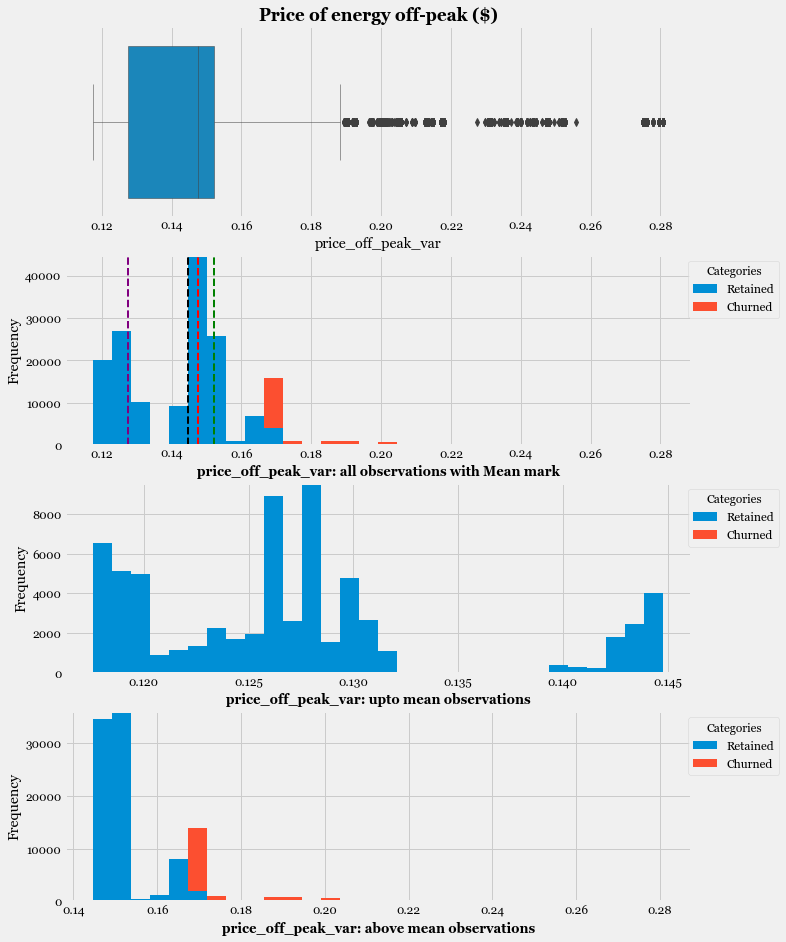

In [105]:
# Price of energy for the 1st period (off peak)
plot_box_hist(price, 'price_off_peak_var', 'Price of energy off-peak ($)', 30, (10, 15))

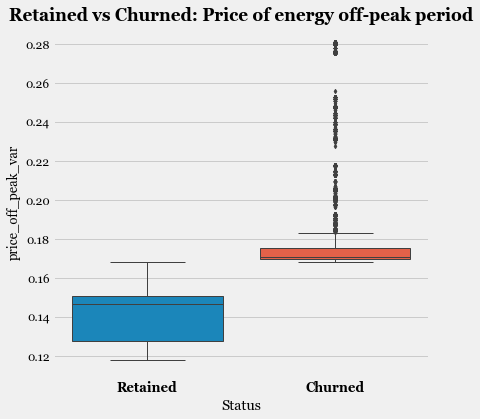

In [106]:
plot_box(price, 'price_off_peak_var', 'Retained vs Churned: Price of energy off-peak period')

#### K2) Price of energy for 2nd period (peak)

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    166244.000000
mean          0.054760
std           0.050126
min           0.000000
25%           0.000000
50%           0.085483
75%           0.102239
max           0.229788
Name: price_peak_var, dtype: float64


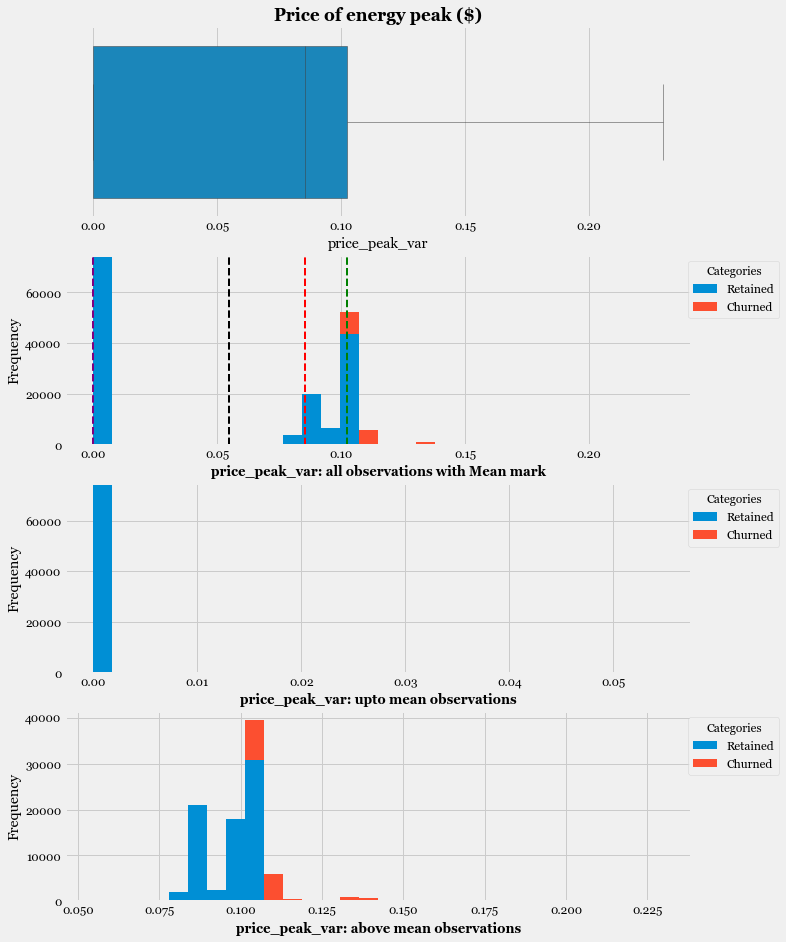

In [107]:
# Price of energy for the 2nd period (peak)
plot_box_hist(price, 'price_peak_var', 'Price of energy peak ($)', 30, (10, 15))

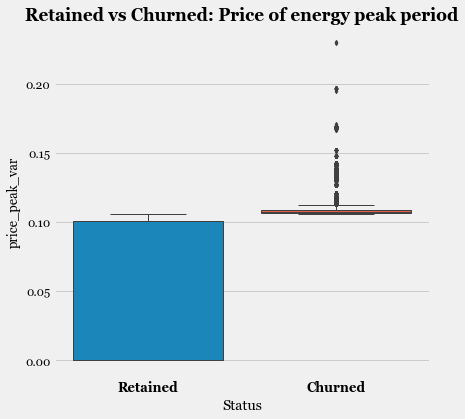

In [108]:
plot_box(price, 'price_peak_var', 'Retained vs Churned: Price of energy peak period')

#### K3) Price of energy for 3rd period (mid-peak)

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    166244.000000
mean          0.029723
std           0.036399
min           0.000000
25%           0.000000
50%           0.000000
75%           0.073270
max           0.114102
Name: price_mid_peak_var, dtype: float64


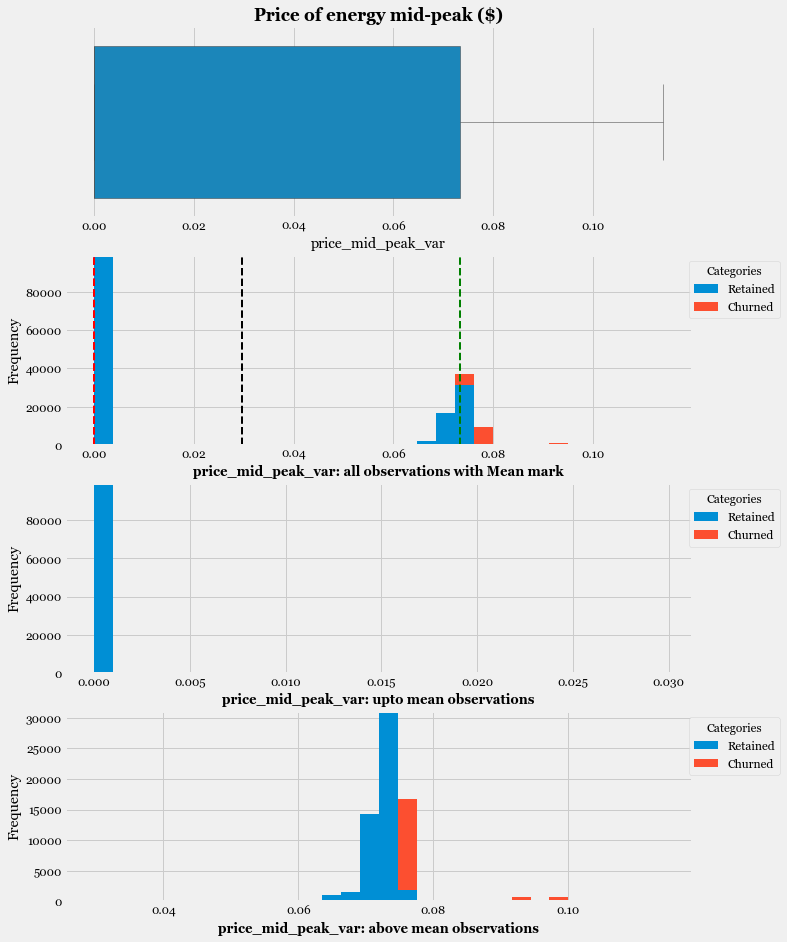

In [109]:
# Price of energy for the 3rd period (mid-peak)
plot_box_hist(price, 'price_mid_peak_var', 'Price of energy mid-peak ($)', 30, (10, 15))

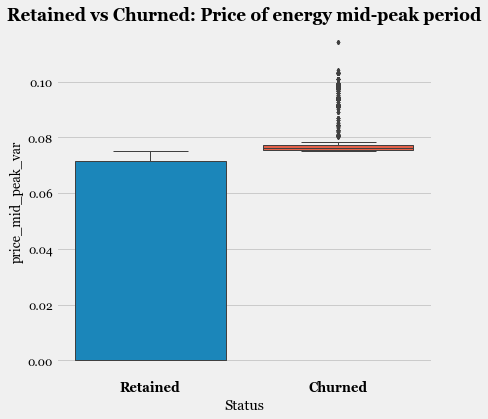

In [110]:
plot_box(price, 'price_mid_peak_var', 'Retained vs Churned: Price of energy mid-peak period')

#### K4) Price of power for 1st period (off-peak)

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    166244.000000
mean         43.359733
std           2.687689
min          40.565969
25%          40.728885
50%          44.266930
75%          44.444710
max          59.444710
Name: price_off_peak_fix, dtype: float64


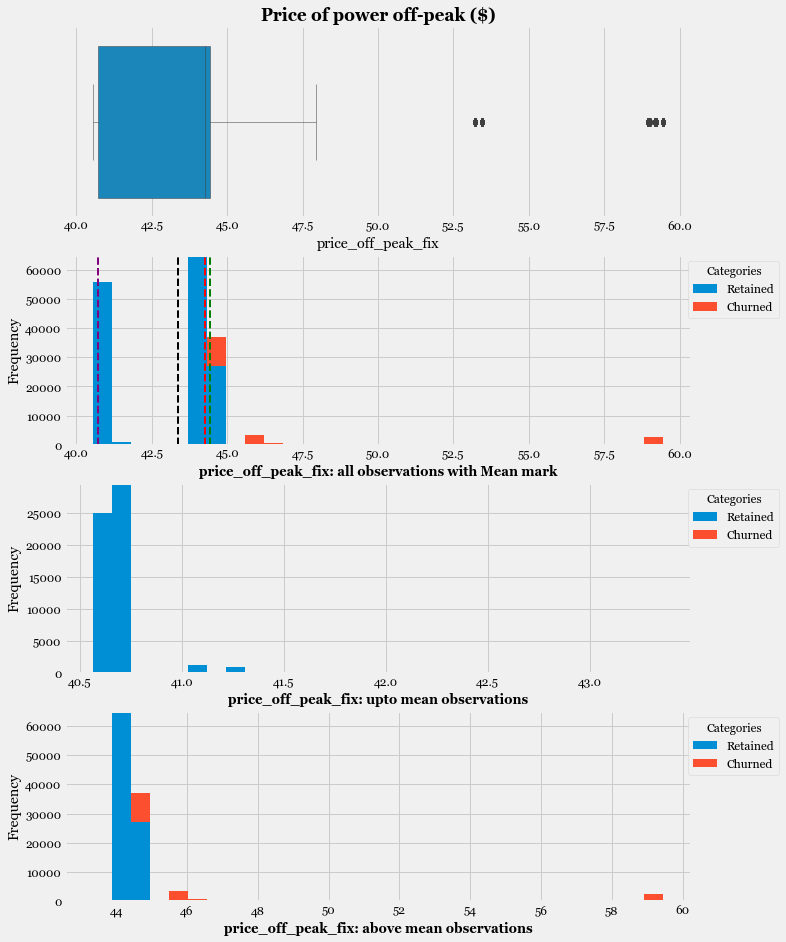

In [111]:
# Price of power for the 1st period (off-peak)
plot_box_hist(price, 'price_off_peak_fix', 'Price of power off-peak ($)', 30, (10, 15))

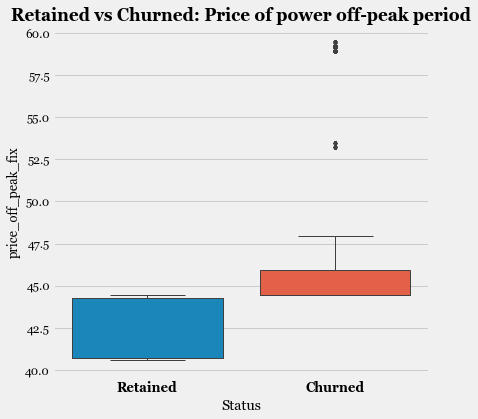

In [112]:
plot_box(price, 'price_off_peak_fix', 'Retained vs Churned: Price of power off-peak period')

#### K5) Price of power for 2nd period (peak)

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    166244.000000
mean          9.931387
std          12.226313
min           0.000000
25%           0.000000
50%           0.000000
75%          24.339581
max          36.490689
Name: price_peak_fix, dtype: float64


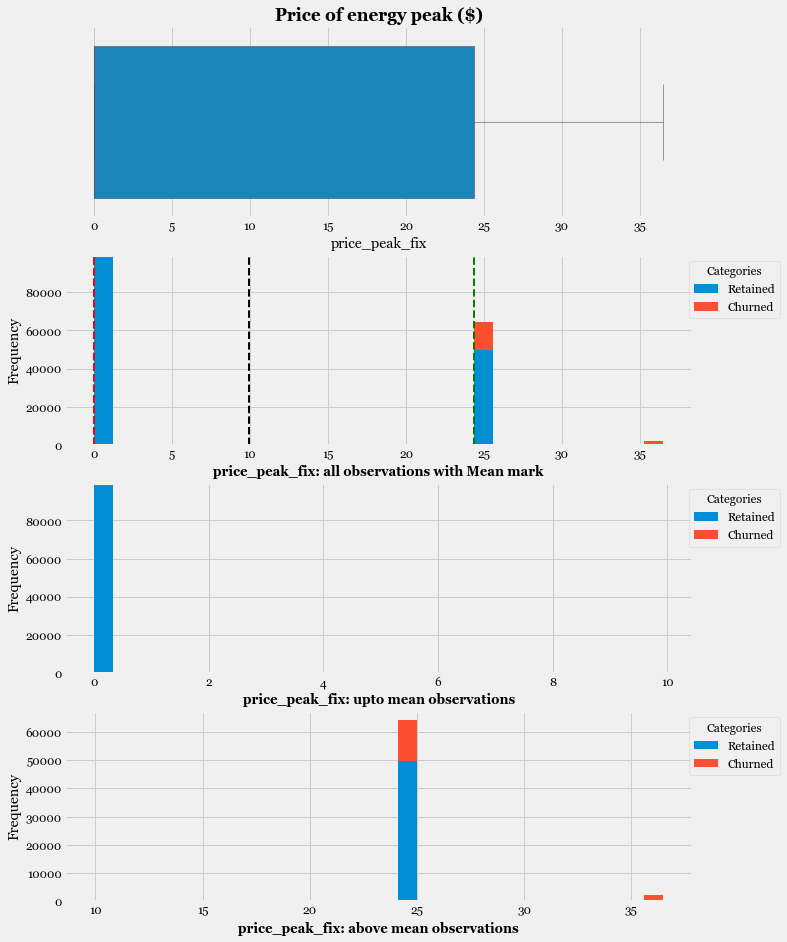

In [113]:
# Price of power for the 2nd period (peak)
plot_box_hist(price, 'price_peak_fix', 'Price of energy peak ($)', 30, (10, 15))

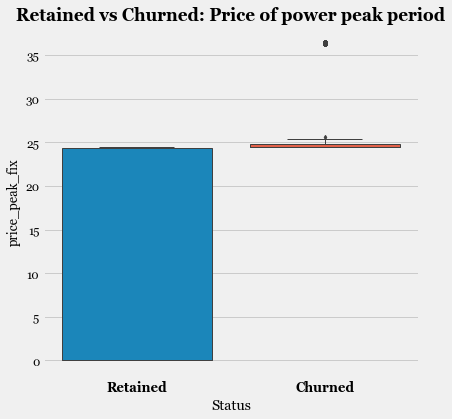

In [114]:
plot_box(price, 'price_peak_fix', 'Retained vs Churned: Price of power peak period')

#### K6) Price of power for 3rd period (mid-peak)

C:\Users\Wendy\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    166244.000000
mean          6.415142
std           7.899543
min           0.000000
25%           0.000000
50%           0.000000
75%          16.226389
max          17.458221
Name: price_mid_peak_fix, dtype: float64


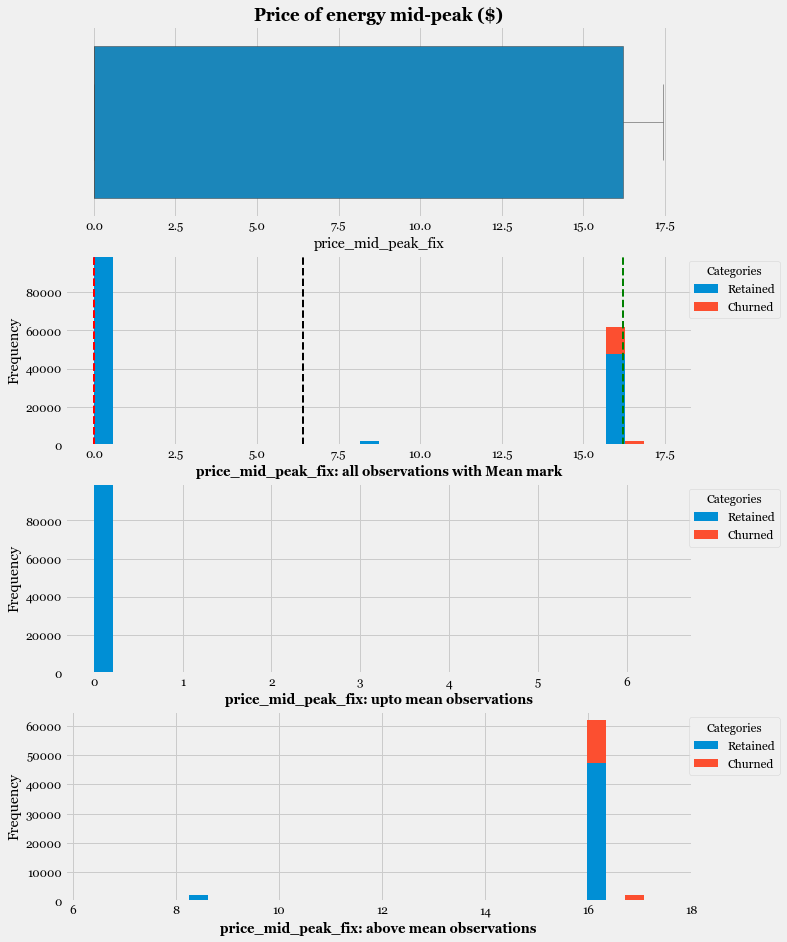

In [115]:
# Price of power for the 3rd period (mid-peak)
plot_box_hist(price, 'price_mid_peak_fix', 'Price of energy mid-peak ($)', 30, (10, 15))

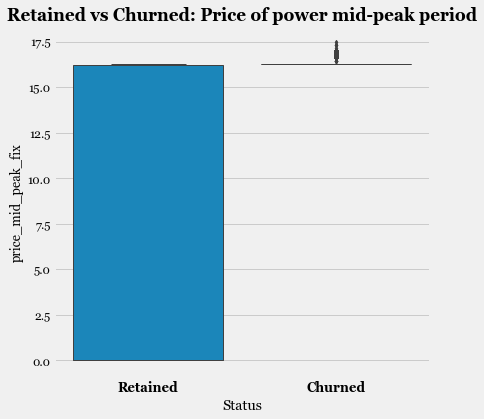

In [116]:
plot_box(price, 'price_mid_peak_fix', 'Retained vs Churned: Price of power mid-peak period')

## 6. Hypothesis Testing

<div class="alert alert-block alert-info">
    <b>
        Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure price sensitivity using the average of the year, the last 6 months and the last 3 months. We use the non-trimmed data for this.<br><br>
        CORRELATION MATRIX:<br>
        <li>The correlation plot of the entire merged data shows a higher magnitude of correlation between price variables.<br> 
        However, the overall correlation with churn is weak. This indicates that there is a weak relation between price and churn. Hence in order to understand the relation between price and churn, we may need to engineer the feature differently.</li>
        <li> On the other hand, the correlation matrix of the merged data that was trimmed at the bottom by 5% shows a higher correlation of price to churn. This indicates that the zero values in the data at the lowest end affects the correlation relation between price and churn.</li><br>
        HYPOTHESIS TESTING:<br>
        Verify the hypothesis of price sensitivity being to some extent correlated with churn.<br>
        sample size = 2000<br>
        alpha = 0.05<br><br>
        <li>PRICE OF 1ST PERIOD OFF-PEAK:</li>
        H0: There is no difference between churn and average yearly off-peak price.<br>
        H1: Churn is higher at higher average yearly off-peak price.<br>
        p = 0.0044<br>
        We reject our null hypothesis.<br>
        Churn is higher at higher average yearly off-peak price.<br><br>
        <li>PRICE OF 2ND PERIOD PEAK:</li>
        H0: There is no difference between churn and average yearly peak price.<br>
        H1: Churn is higher at higher average yearly peak price.<br>
        p = 0.0002<br>
        We reject our null hypothesis.<br>
        Churn is higher at higher average yearly peak price.<br><br>
        <li>PRICE OF 3RD PERIOD MID-PEAK:</li>
        H0: There is no difference between churn and average yearly mid-peak price.<br>
        H1: Churn is higher at higher average yearly mid-peak price.<br>
        p = 0.0002<br>
        We reject our null hypothesis.<br>
        Churn is higher at higher average yearly mid-peak price.<br><br>
        While,the results of the correlation matrix and hypothesis testing do offer some indication of a relation between price sensitivity and churn, we will need to further strengthen the argument with feature engineering and considering other variables in order to strengthen the prediction model.
    </b>
</div>

In [117]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [118]:
price_df.shape

(193002, 8)

#### A) Feature Engineering

In [119]:
# Create mean average for year
mean_year = price_df.groupby(['id']).mean().reset_index()

# Rename columns
mean_year = mean_year.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_year_price_p1_var",
        "price_peak_var": "mean_year_price_p2_var",
        "price_mid_peak_var": "mean_year_price_p3_var",
        "price_off_peak_fix": "mean_year_price_p1_fix",
        "price_peak_fix": "mean_year_price_p2_fix",
        "price_mid_peak_fix": "mean_year_price_p3_fix"
    }
)

# Combine prices
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

mean_year.head(3)

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000


In [120]:
mean_year.shape

(16096, 10)

In [121]:
# Create mean average last 6 months
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()

# Rename columns
mean_6m = mean_6m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_6m_price_p1_var",
        "price_peak_var": "mean_6m_price_p2_var",
        "price_mid_peak_var": "mean_6m_price_p3_var",
        "price_off_peak_fix": "mean_6m_price_p1_fix",
        "price_peak_fix": "mean_6m_price_p2_fix",
        "price_mid_peak_fix": "mean_6m_price_p3_fix"
    }
)

# Combine prices
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

mean_6m.head(3)

,id,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000


In [122]:
mean_6m.shape

(16096, 10)

In [123]:
# Create mean average last 3 months
mean_3m = price_df[price_df['price_date'] > '2015-09-01'].groupby(['id']).mean().reset_index()

# Rename columns
mean_3m = mean_3m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_3m_price_p1_var",
        "price_peak_var": "mean_3m_price_p2_var",
        "price_mid_peak_var": "mean_3m_price_p3_var",
        "price_off_peak_fix": "mean_3m_price_p1_fix",
        "price_peak_fix": "mean_3m_price_p2_fix",
        "price_mid_peak_fix": "mean_3m_price_p3_fix"
    }
)

# Combine prices
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

mean_3m.head(3)

,id,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000


In [124]:
mean_3m.shape

(16096, 10)

In [125]:
# Merge dataframes
new_price = pd.merge(mean_year, mean_6m, on='id')
new_price = pd.merge(new_price, mean_3m, on='id')

new_price.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,40.843313,24.533410,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [126]:
new_price.shape

(16096, 28)

In [127]:
# Merge with churn data
merged_price = pd.merge(new_price, churn_data[['id', 'Status']], on='id')
merged_price.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,Status
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,0.123007,0.104108,0.075469,40.728885,24.43733,16.291555,40.851892,24.541438,16.367024,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


In [128]:
merged_price.shape

(14593, 29)

In [129]:
# Define correlation matrix function
def correlation_heatmap(dataframe, size_=(20,20)):
    
    # Set the style of the visualization
    sns.set(style="white")
    
    plt.style.use('fivethirtyeight') #ggplot #fivethirtyeight #seaborn-dark
    font = {'family' : 'Georgia',
        'weight' : 'normal',
        'size'   : 12}
    
    matplotlib.rc('font', **font)
    
    # Create a covariance matrix
    corr = dataframe.corr()

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_)

    # Generate a custom diverging colormap
    cmap = mcolors.LinearSegmentedColormap.from_list("n",['#fc4f30','#ffffff','#30a2da'])
    
    mask = np.triu(np.ones_like(merged_price.corr(), dtype=np.bool))
    
    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, mask=mask, cbar_kws={"shrink": .5}, vmin=-1, vmax=1, annot = True)
    ax.set_title('Correlation Matrix', fontsize=17, fontweight='bold')
    plt.show()

C:\Users\Wendy\AppData\Local\Temp/ipykernel_2312/4183513574.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(merged_price.corr(), dtype=np.bool))


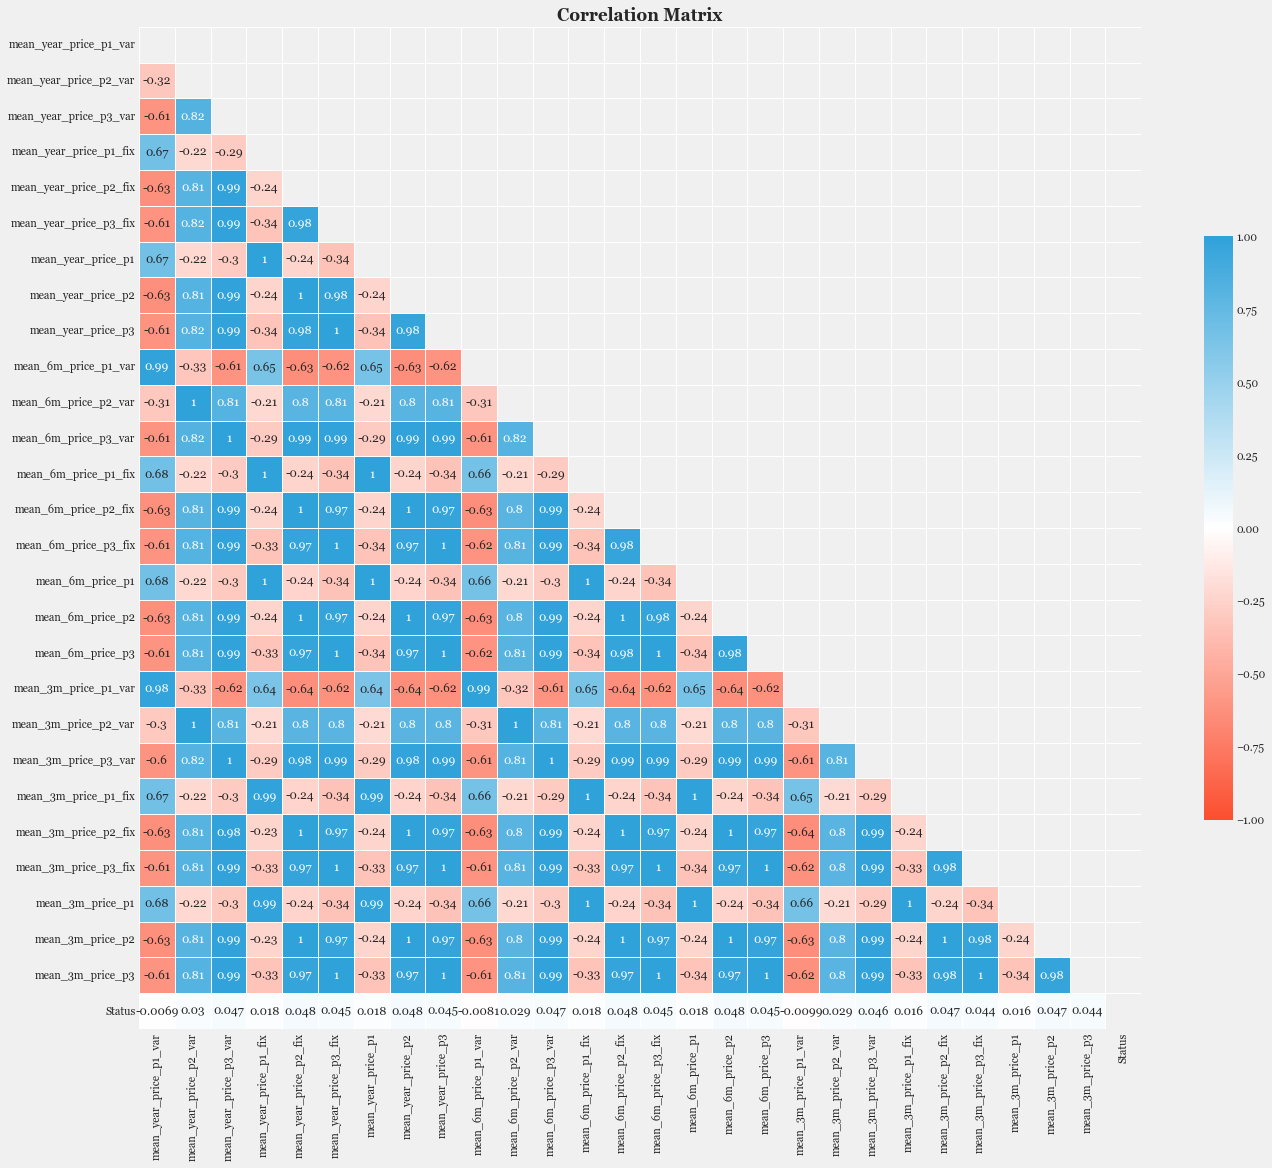

In [130]:
# Correlation matrix of complete merged data
correlation_heatmap(merged_price)

In [131]:
# Remove bottom 5% of observations
trim_data = pd.DataFrame(stats.trim1(merged_price, 0.05, tail='left'), columns=merged_price.columns)

In [132]:
trim_data.shape

(13864, 29)

In [133]:
trim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13864 entries, 0 to 13863
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      13864 non-null  object
 1   mean_year_price_p1_var  13864 non-null  object
 2   mean_year_price_p2_var  13864 non-null  object
 3   mean_year_price_p3_var  13864 non-null  object
 4   mean_year_price_p1_fix  13864 non-null  object
 5   mean_year_price_p2_fix  13864 non-null  object
 6   mean_year_price_p3_fix  13864 non-null  object
 7   mean_year_price_p1      13864 non-null  object
 8   mean_year_price_p2      13864 non-null  object
 9   mean_year_price_p3      13864 non-null  object
 10  mean_6m_price_p1_var    13864 non-null  object
 11  mean_6m_price_p2_var    13864 non-null  object
 12  mean_6m_price_p3_var    13864 non-null  object
 13  mean_6m_price_p1_fix    13864 non-null  object
 14  mean_6m_price_p2_fix    13864 non-null  object
 15  me

In [134]:
# correct data types
# Convert to numerical type
trim_data[['Status']] = trim_data[['Status']].astype(np.int64)
trim_data[['mean_year_price_p1_var', 'mean_year_price_p2_var', 'mean_year_price_p3_var', 'mean_year_price_p1_fix', 'mean_year_price_p2_fix', 'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3']] = trim_data[['mean_year_price_p1_var', 'mean_year_price_p2_var', 'mean_year_price_p3_var', 'mean_year_price_p1_fix', 'mean_year_price_p2_fix', 'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3']].astype(np.float64)
trim_data[['mean_6m_price_p1_var', 'mean_6m_price_p2_var', 'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_price_p3']] = trim_data[['mean_6m_price_p1_var', 'mean_6m_price_p2_var', 'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_price_p3']].astype(np.float64)
trim_data[['mean_3m_price_p1_var', 'mean_3m_price_p2_var', 'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 'mean_3m_price_p2_fix', 'mean_3m_price_p3_fix', 'mean_3m_price_p1', 'mean_3m_price_p2', 'mean_3m_price_p3']] = trim_data[['mean_3m_price_p1_var', 'mean_3m_price_p2_var', 'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 'mean_3m_price_p2_fix', 'mean_3m_price_p3_fix', 'mean_3m_price_p1', 'mean_3m_price_p2', 'mean_3m_price_p3']].astype(np.float64)

In [135]:
trim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13864 entries, 0 to 13863
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      13864 non-null  object 
 1   mean_year_price_p1_var  13864 non-null  float64
 2   mean_year_price_p2_var  13864 non-null  float64
 3   mean_year_price_p3_var  13864 non-null  float64
 4   mean_year_price_p1_fix  13864 non-null  float64
 5   mean_year_price_p2_fix  13864 non-null  float64
 6   mean_year_price_p3_fix  13864 non-null  float64
 7   mean_year_price_p1      13864 non-null  float64
 8   mean_year_price_p2      13864 non-null  float64
 9   mean_year_price_p3      13864 non-null  float64
 10  mean_6m_price_p1_var    13864 non-null  float64
 11  mean_6m_price_p2_var    13864 non-null  float64
 12  mean_6m_price_p3_var    13864 non-null  float64
 13  mean_6m_price_p1_fix    13864 non-null  float64
 14  mean_6m_price_p2_fix    13864 non-null

C:\Users\Wendy\AppData\Local\Temp/ipykernel_2312/4183513574.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(merged_price.corr(), dtype=np.bool))


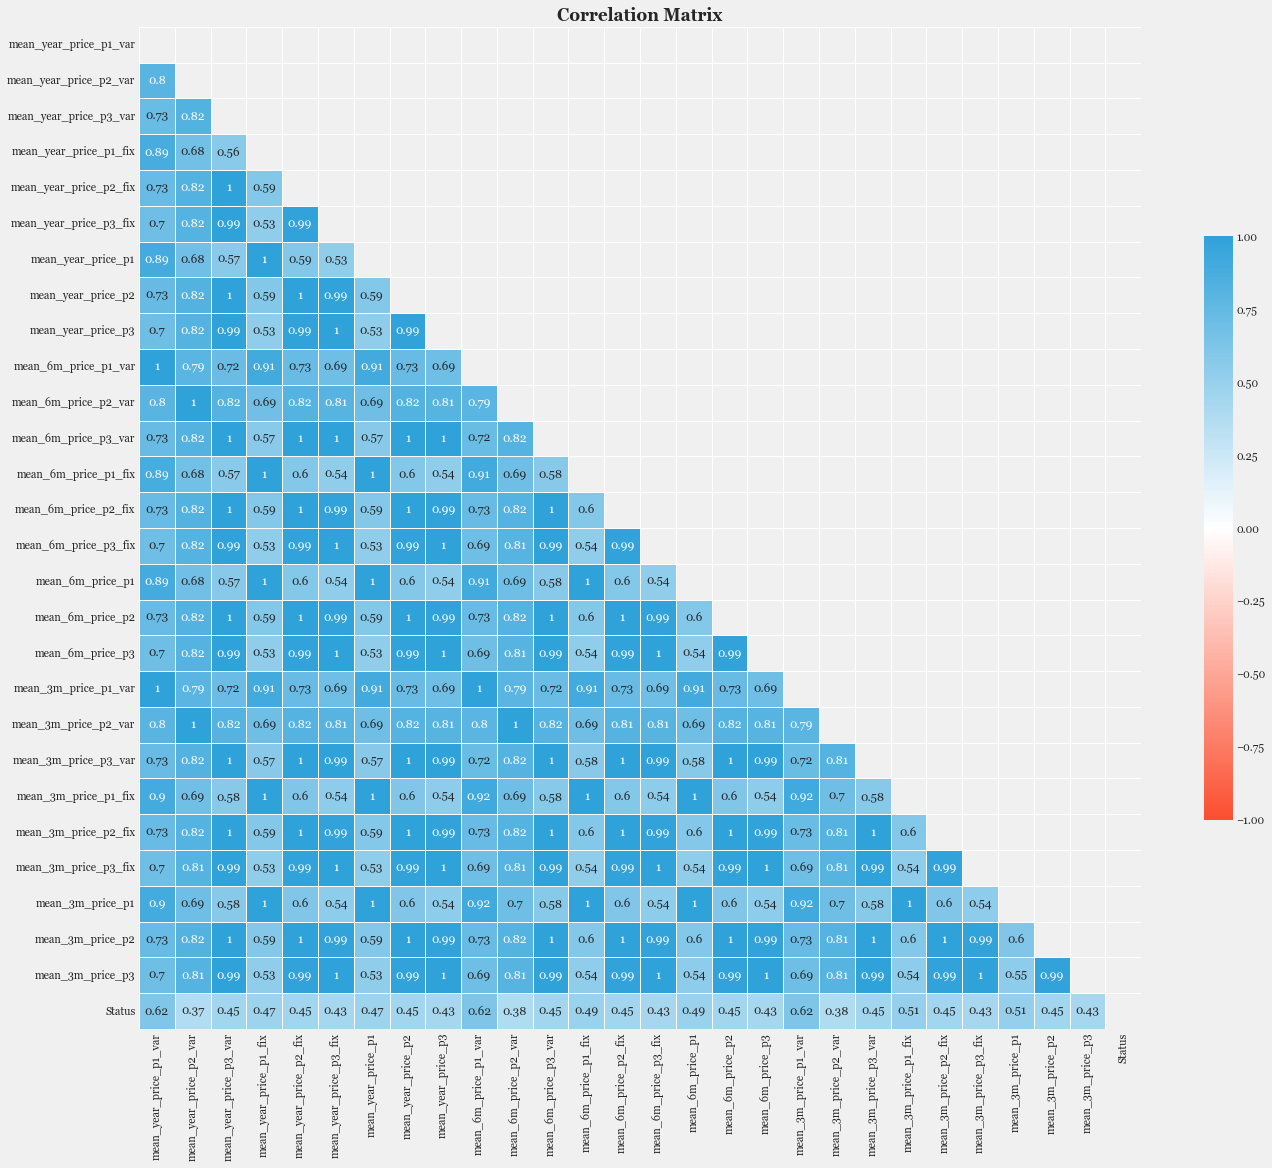

In [136]:
# Correlation matrix of trimmed merged data
correlation_heatmap(trim_data)

#### A1) Price for average yearly 1st period (off-peak)

In [137]:
merged_price.mean_year_price_p1.describe()

count    14593.000000
mean        43.056780
std          4.542020
min          0.000000
25%         40.813781
50%         44.436773
75%         44.519593
max         59.564289
Name: mean_year_price_p1, dtype: float64

In [138]:
# Subset dataset into low an high price based on mean
price_low_p1 = merged_price[merged_price['mean_year_price_p1'] <= 43.056678].sample(2000, random_state=42)
price_high_p1 = merged_price[merged_price['mean_year_price_p1'] > 43.056678].sample(2000, random_state=42)

In [139]:
price_low_p1['Status'].value_counts()

0    1772
1     228
Name: Status, dtype: int64

In [140]:
price_high_p1['Status'].value_counts()

0    1822
1     178
Name: Status, dtype: int64

In [141]:
# Setting the two samples
N = 2000

a1 = price_low_p1['Status']
b1 = price_high_p1['Status']

alpha = 0.05

In [142]:
## Testing with the scipy function
t1, p1 = stats.ttest_ind(a1,b1)

print("t1 = " + str(t1))
print("p1 = " + str(p1))
print(f'p1 one-tailed:{p1/2:.4f}')

t1 = 2.6194596055860946
p1 = 0.008840196447381501
p1 one-tailed:0.0044


In [143]:
def print_sig(p_value, alpha):
    print(p_value/2)
    if p_value/2 < alpha:
        print("We reject our null hypothesis.")
    elif p_value/2 > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [144]:
print_sig(p1, alpha)

0.004420098223690751
We reject our null hypothesis.


#### A2) Price for average yearly 2nd period (peak)

In [145]:
merged_price.mean_year_price_p2.describe()

count    14593.000000
mean         9.488822
std         12.072410
min          0.000000
25%          0.000000
50%          0.084588
75%         24.477010
max         36.587507
Name: mean_year_price_p2, dtype: float64

In [146]:
# Subset dataset into low an high price based on mean
price_low_p2 = merged_price[merged_price['mean_year_price_p2'] <= 9.489466].sample(2000, random_state=42)
price_high_p2 = merged_price[merged_price['mean_year_price_p2'] > 9.489466].sample(2000, random_state=42)

In [147]:
price_low_p2['Status'].value_counts()

0    1840
1     160
Name: Status, dtype: int64

In [148]:
price_high_p2['Status'].value_counts()

0    1774
1     226
Name: Status, dtype: int64

In [149]:
# Setting the two samples
N = 2000

a2 = price_low_p2['Status']
b2 = price_high_p2['Status']

alpha = 0.05

In [150]:
## Testing with the scipy function
t2, p2 = stats.ttest_ind(a2,b2)

print("t2 = " + str(t2))
print("p2 = " + str(p2))
print(f'p2 one-tailed:{p2/2:.4f}')

t2 = -3.5388057369890094
p2 = 0.0004065143703649409
p2 one-tailed:0.0002


In [151]:
def print_sig(p_value, alpha):
    print(p_value/2)
    if p_value/2 < alpha:
        print("We reject our null hypothesis.")
    elif p_value/2 > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [152]:
print_sig(p2, alpha)

0.00020325718518247044
We reject our null hypothesis.


#### A3) Price for average yearly 3rd period (mid-peak)

In [153]:
merged_price.mean_year_price_p3.describe()

count    14593.000000
mean         6.123900
std          7.809420
min          0.000000
25%          0.000000
50%          0.000000
75%         16.320634
max         16.911504
Name: mean_year_price_p3, dtype: float64

In [154]:
# Subset dataset into low an high price based on mean
price_low_p3 = merged_price[merged_price['mean_year_price_p3'] <= 6.124320].sample(2000, random_state=42)
price_high_p3 = merged_price[merged_price['mean_year_price_p3'] > 6.124320].sample(2000, random_state=42)

In [155]:
price_low_p3['Status'].value_counts()

0    1840
1     160
Name: Status, dtype: int64

In [156]:
price_high_p3['Status'].value_counts()

0    1774
1     226
Name: Status, dtype: int64

In [157]:
# Setting the two samples
N = 2000

a3 = price_low_p3['Status']
b3 = price_high_p3['Status']

alpha = 0.05

In [158]:
## Testing with the scipy function
t3, p3 = stats.ttest_ind(a3,b3)

print("t3 = " + str(t3))
print("p3 = " + str(p3))
print(f'p3 one-tailed:{p3/2:.4f}')

t3 = -3.5388057369890094
p3 = 0.0004065143703649409
p3 one-tailed:0.0002


In [159]:
def print_sig(p_value, alpha):
    print(p_value/2)
    if p_value/2 < alpha:
        print("We reject our null hypothesis.")
    elif p_value/2 > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [160]:
print_sig(p3, alpha)

0.00020325718518247044
We reject our null hypothesis.


In [161]:
# Merge with client dataframe
merged_data = pd.merge(new_client_df.drop(columns=['churn']), merged_price, on='id')
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,Status
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,14287.0,54946.0,2212.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1149.83,1395.5,0.0,1.78,0.114481,0.098142,40.606701,t,159.96,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.126997,0.095024,0.049213,41.908233,16.291553,10.861037,42.035230,16.386577,10.910249,1
1,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,4660.0,0.0,2212.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,1395.5,0.0,16.27,0.145711,0.098837,44.311378,f,159.96,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.014247,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,2212.0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,1395.5,0.0,38.72,0.165794,0.087899,44.311378,f,159.96,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.088535,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,2212.0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,1395.5,0.0,19.83,0.146694,0.098837,44.311378,f,159.96,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,foosdfpfkusacimwkcsosbicdxkicaua,4425.0,0.0,526.0,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526.0,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,40.812330,24.516531,16.348129,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [162]:
merged_data.shape

(14593, 53)

In [163]:
# Save dataframe
merged_data.to_csv('clean_data_after_eda.csv')